In [1]:
import uproot
import awkward as ak
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mplhep as hep
import os, glob
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import mplhep as hep
plt.style.use([hep.style.ROOT, hep.style.firamath])
from matplotlib.colors import LinearSegmentedColormap
# Define the CMS color scheme
cms_colors = [
    (0.00, '#FFFFFF'),  # White
    (0.33, '#005EB8'),  # Blue
    (0.66, '#FFDD00'),  # Yellow
    (1.00, '#FF0000')   # red
]

# Create the CMS colormap
cms_cmap = LinearSegmentedColormap.from_list('CMS', cms_colors)

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-8dirzzoi because the default path (/uscms/home/bbbam/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


### Single samples samples

In [2]:
# out_dir='data/plot_H_AA_4Tau_M_10_signal_kinematics'
out_dir='data/plot_A_2Tau_genInfo_traing'
if not os.path.isdir(out_dir):
    os.makedirs(out_dir)
save = False

In [3]:
# ! ls ../analysis_run3/Gen_Trigger_Information/CMSSW_13_0_13/src/Gen/Ntuples

In [63]:
# file = uproot.open("data/GenInfo_only_90.root")
file_m3p7 = uproot.open("../analysis_run3/Gen_Trigger_Information/CMSSW_13_0_13/src/Gen/Ntuples/GenInfo_with_trigger_cut_signal_M3p7_combined.root")
file_m4 = uproot.open("../analysis_run3/Gen_Trigger_Information/CMSSW_13_0_13/src/Gen/Ntuples/GenInfo_with_trigger_cut_signal_M4_combined.root")
file_m5 = uproot.open("../analysis_run3/Gen_Trigger_Information/CMSSW_13_0_13/src/Gen/Ntuples/GenInfo_with_trigger_cut_signal_M5_combined.root")
file_m6 = uproot.open("../analysis_run3/Gen_Trigger_Information/CMSSW_13_0_13/src/Gen/Ntuples/GenInfo_with_trigger_cut_signal_M6_combined.root")
file_m8 = uproot.open("../analysis_run3/Gen_Trigger_Information/CMSSW_13_0_13/src/Gen/Ntuples/GenInfo_with_trigger_cut_signal_M8_combined.root")
file_m10 = uproot.open("../analysis_run3/Gen_Trigger_Information/CMSSW_13_0_13/src/Gen/Ntuples/GenInfo_with_trigger_cut_signal_M10_combined.root")
file_m12 = uproot.open("../analysis_run3/Gen_Trigger_Information/CMSSW_13_0_13/src/Gen/Ntuples/GenInfo_with_trigger_cut_signal_M12_combined.root")
file_m14 = uproot.open("../analysis_run3/Gen_Trigger_Information/CMSSW_13_0_13/src/Gen/Ntuples/GenInfo_with_trigger_cut_signal_M14_combined.root")

RHTree_m3p7 = file_m3p7["fevt/RHTree"]
RHTree_m4 = file_m4["fevt/RHTree"]
RHTree_m5 = file_m5["fevt/RHTree"]
RHTree_m6 = file_m6["fevt/RHTree"]
RHTree_m8 = file_m8["fevt/RHTree"]
RHTree_m10 = file_m10["fevt/RHTree"]
RHTree_m12 = file_m12["fevt/RHTree"]
RHTree_m14 = file_m14["fevt/RHTree"]

Totgal entry 226960 triggered 4018


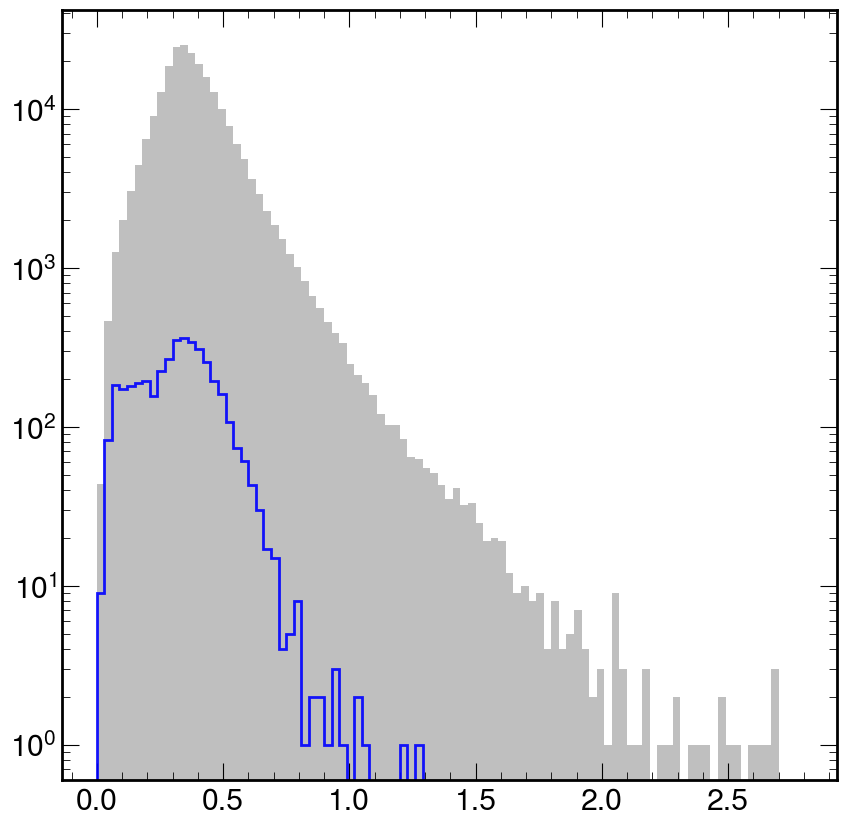

In [80]:
RHTree= RHTree_m10
dR_Tau1_Tau2_after_trigger = RHTree.arrays(["dR_Tau1_Tau2"], "trigger > 0", library="numpy")["dR_Tau1_Tau2"]
dR_Tau1_Tau2_flat = np.concatenate(dR_Tau1_Tau2_after_trigger)
dR_Tau1_Tau2 = RHTree.arrays(["dR_Tau1_Tau2"],"dR_Tau1_Tau2 > -111",library="pd")['dR_Tau1_Tau2']
print("Totgal entry", len(dR_Tau1_Tau2), "triggered", len(dR_Tau1_Tau2_flat))
total_events.append(len(dR_Tau1_Tau2))
triggered_events.append(len(dR_Tau1_Tau2_flat))
fig, ax = plt.subplots()
plt.hist(dR_Tau1_Tau2,bins=np.arange(0,2.8,0.03),linestyle='--',linewidth=2, color='grey',alpha=0.5,label=f"dR_Tau1_Tau2 ({total_events[i]})", density=0)
plt.hist(dR_Tau1_Tau2_flat,bins=np.arange(0,2.8,0.03),histtype='step',linewidth=2, color='b',alpha=0.9,label=f"dR_Tau1_Tau2_triggered ({triggered_events[i]})", density=0)
plt.yscale("log")

In [58]:
# RHTree.keys()
# RHTree.typenames()
# RHTree.show()

Totgal entry 282874 triggered 4267


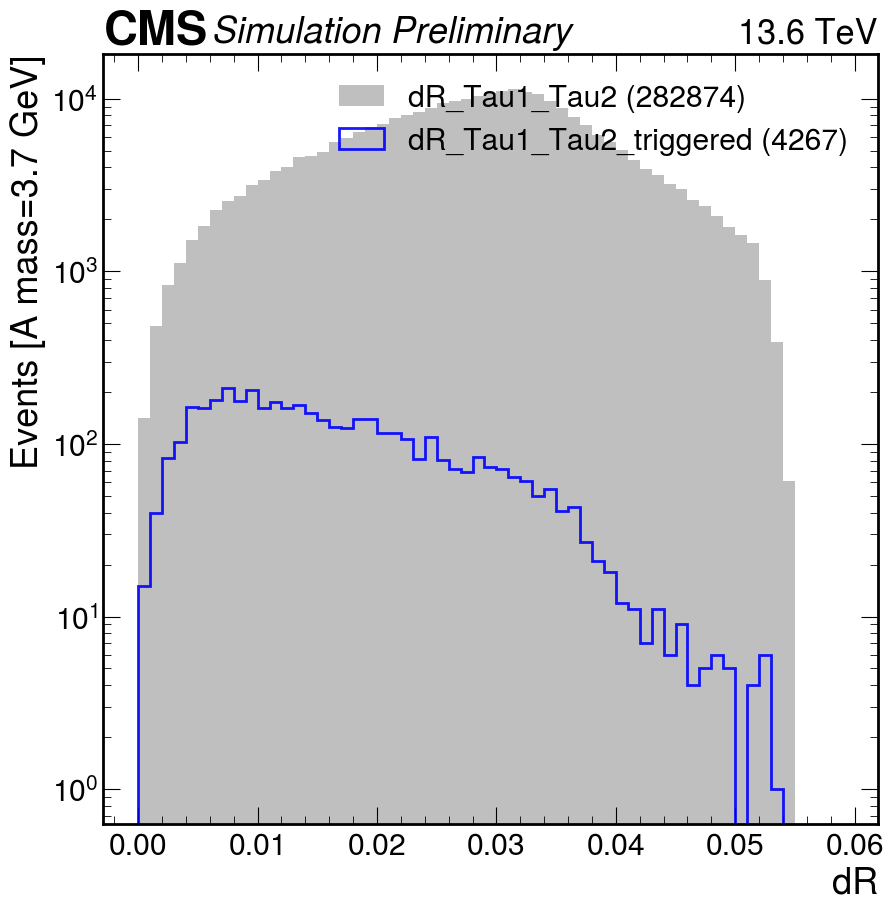

Totgal entry 288633 triggered 3393


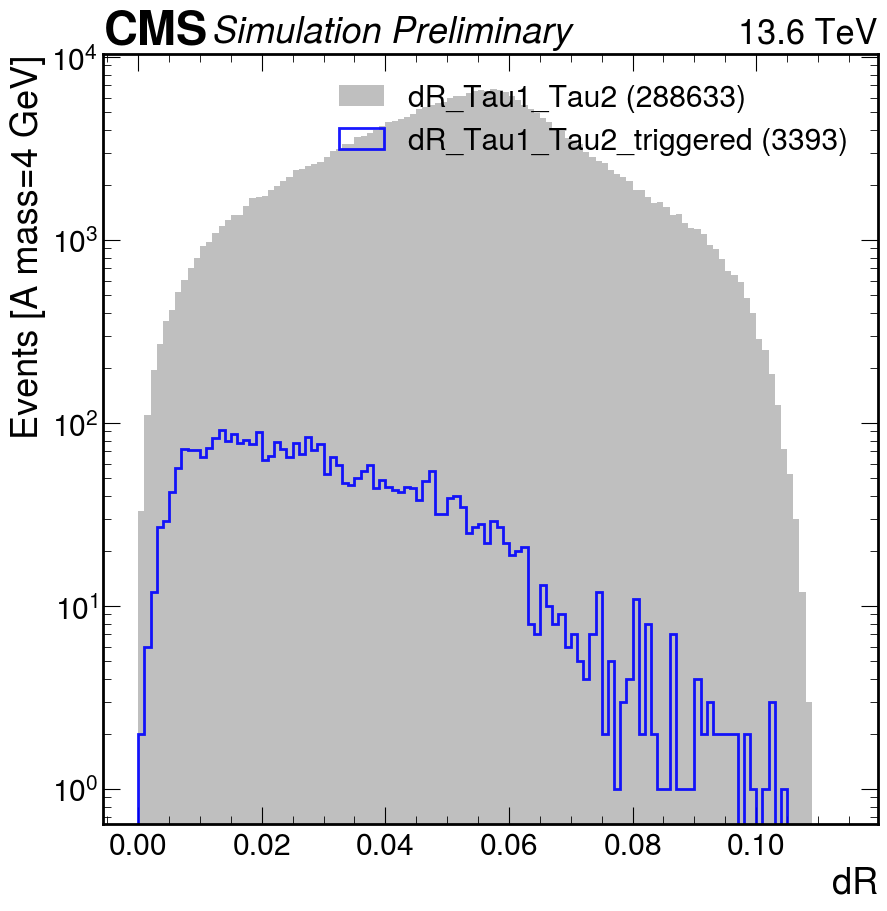

Totgal entry 278963 triggered 2681


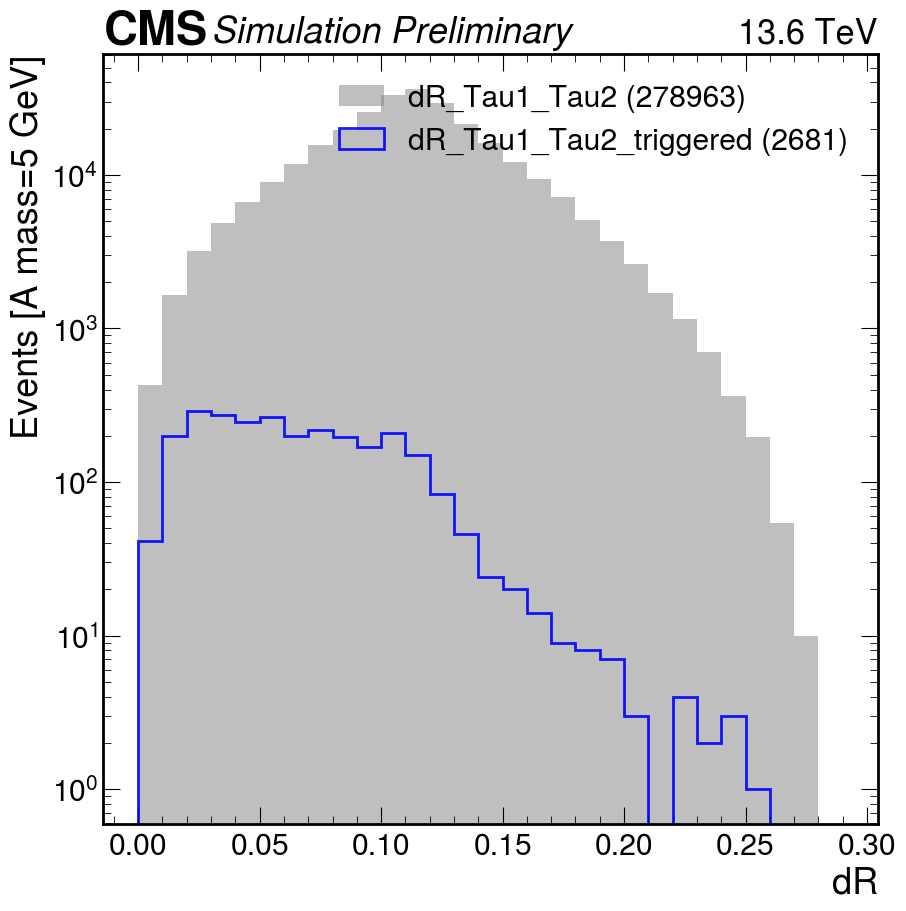

Totgal entry 266260 triggered 2655


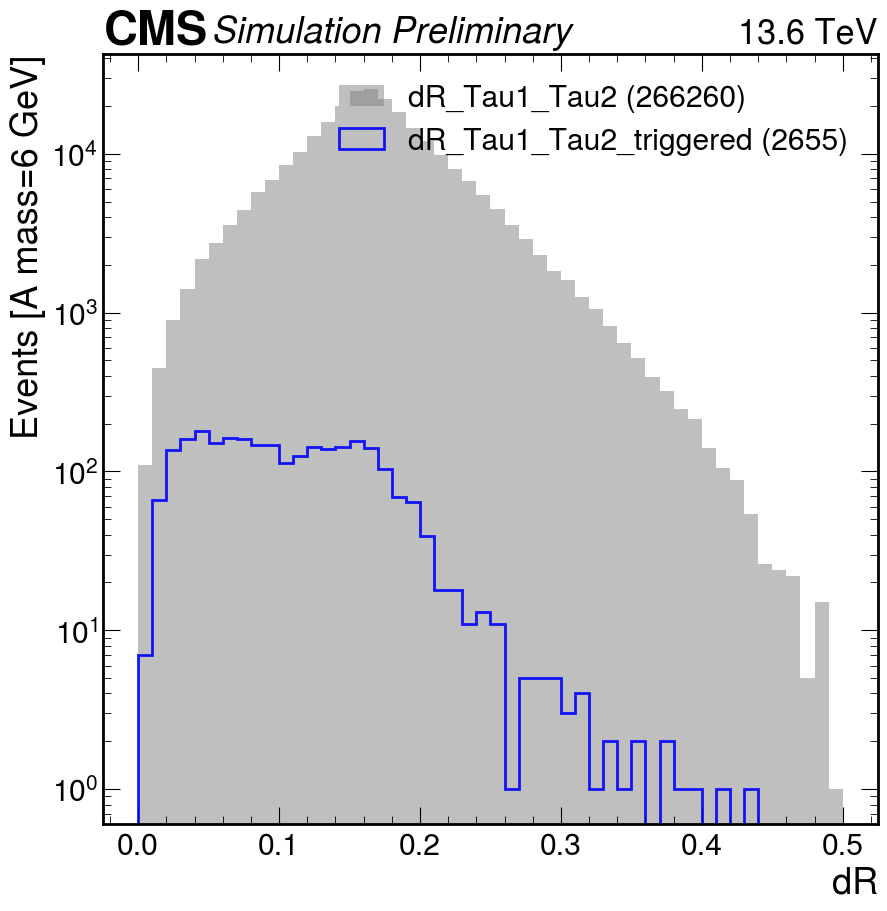

Totgal entry 244915 triggered 3242


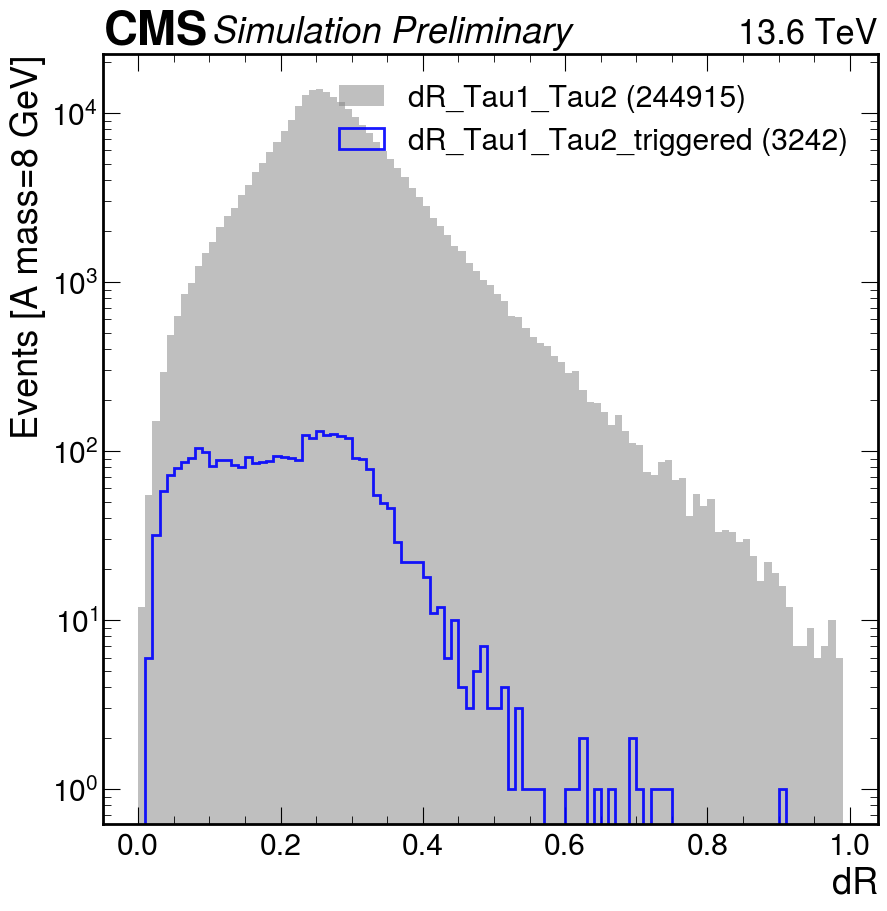

Totgal entry 226960 triggered 4018


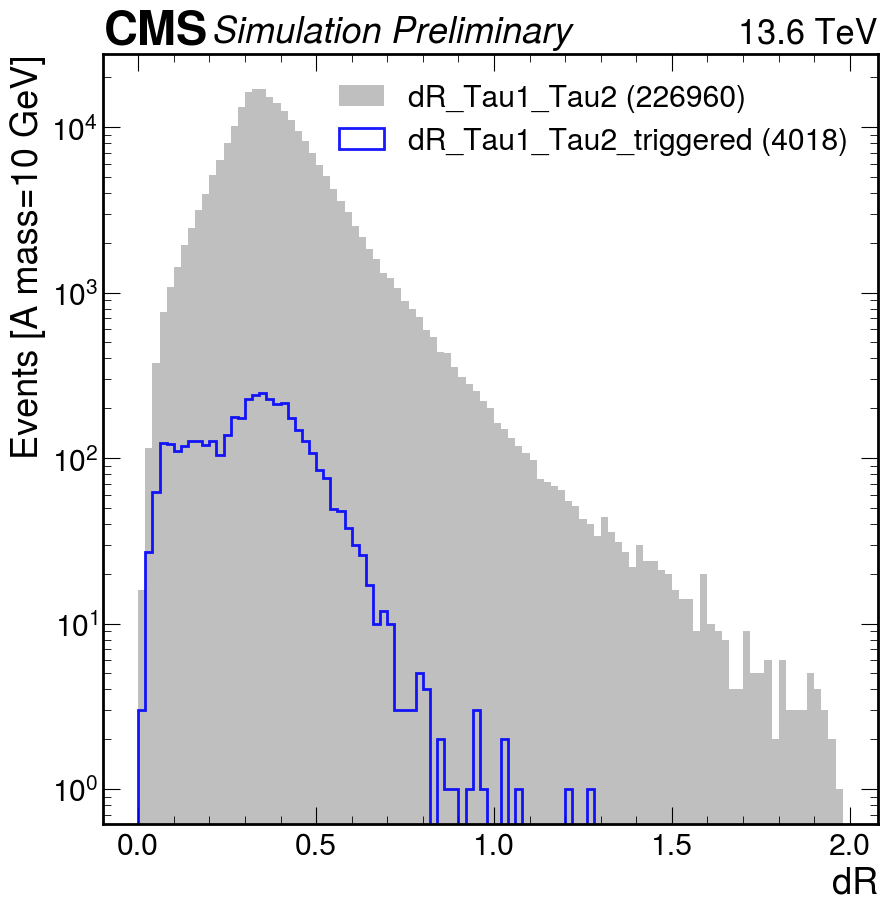

Totgal entry 213191 triggered 4697


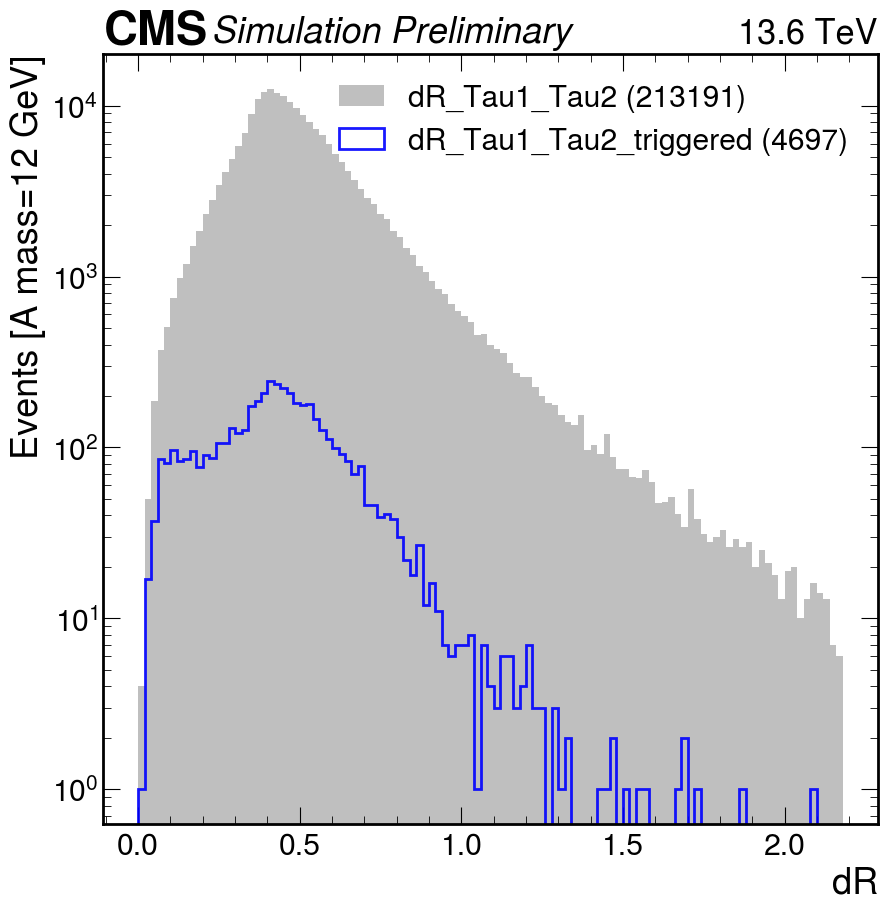

Totgal entry 201297 triggered 5216


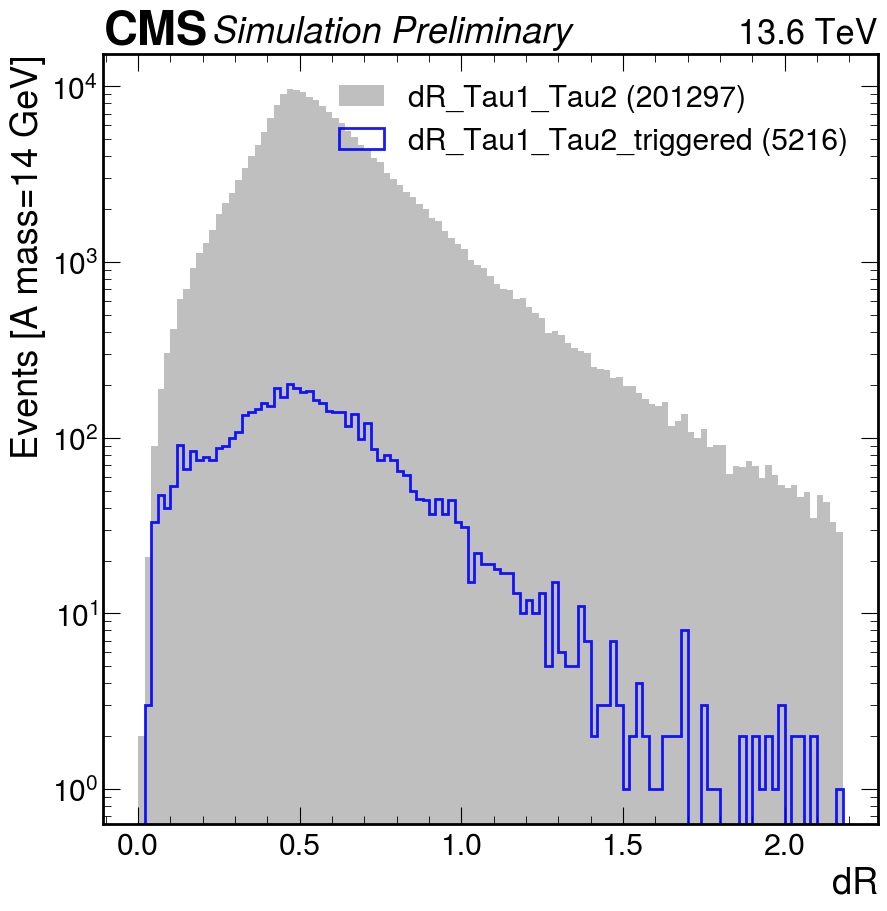

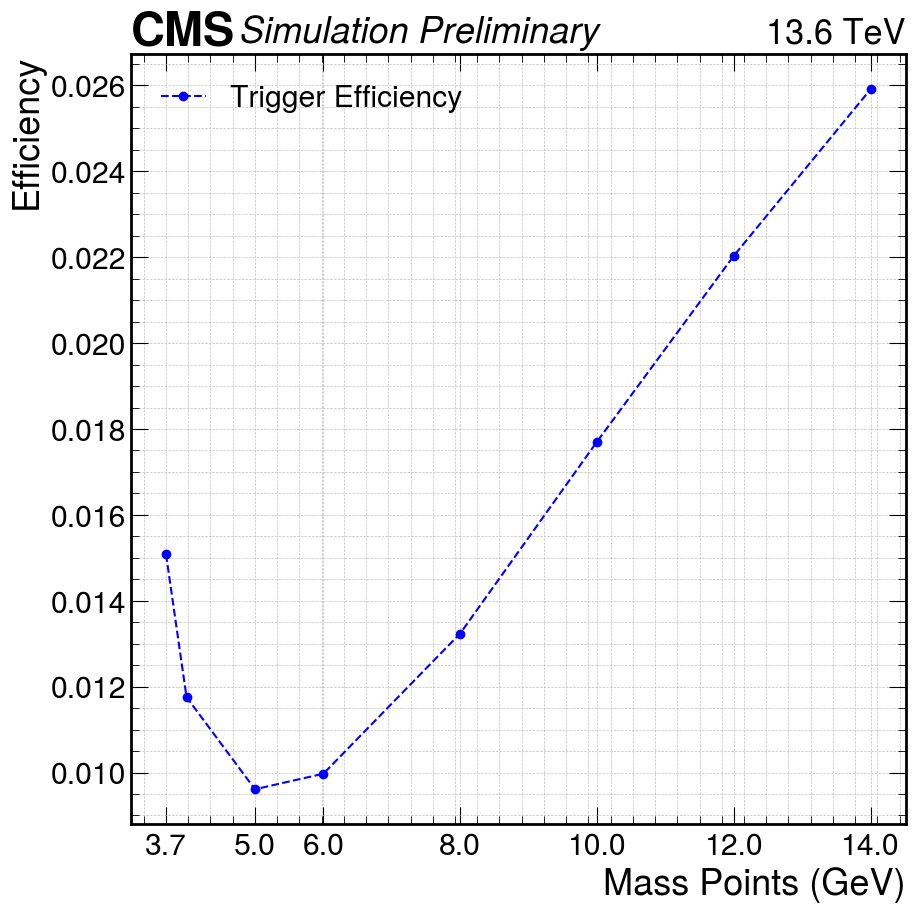

In [83]:
bins_m3p7=np.arange(0,0.06,0.001)
bins_m4=np.arange(0,0.115,0.001)
bins_m5=np.arange(0,0.3,0.01)
bins_m6=np.arange(0,0.51,0.01)
bins_m8=np.arange(0,1,0.01)
bins_m10=np.arange(0,2,0.02)
bins_m12=np.arange(0,2.2,0.02)
bins_m14=np.arange(0,2.2,0.02)
bins = [bins_m3p7, bins_m4, bins_m5, bins_m6, bins_m8, bins_m10, bins_m12, bins_m14]
RHTree_list = [RHTree_m3p7, RHTree_m4, RHTree_m5, RHTree_m6, RHTree_m8,RHTree_m10, RHTree_m12, RHTree_m14]
mass = [3.7, 4, 5, 6, 8, 10, 12, 14]
total_events = []
triggered_events = []
for i, RHTree in enumerate(RHTree_list):
    dR_Tau1_Tau2_after_trigger = RHTree.arrays(["dR_Tau1_Tau2"], "trigger > 0", library="numpy")["dR_Tau1_Tau2"]
    dR_Tau1_Tau2_flat = np.concatenate(dR_Tau1_Tau2_after_trigger)
    dR_Tau1_Tau2 = RHTree.arrays(["dR_Tau1_Tau2"],"dR_Tau1_Tau2 > -111",library="pd")['dR_Tau1_Tau2']
    print("Totgal entry", len(dR_Tau1_Tau2), "triggered", len(dR_Tau1_Tau2_flat))
    total_events.append(len(dR_Tau1_Tau2))
    triggered_events.append(len(dR_Tau1_Tau2_flat))
    fig, ax = plt.subplots()
    plt.hist(dR_Tau1_Tau2,bins=bins[i],linestyle='--',linewidth=2, color='grey',alpha=0.5,label=f"dR_Tau1_Tau2 ({total_events[i]})", density=0)
    plt.hist(dR_Tau1_Tau2_flat,bins=bins[i],histtype='step',linewidth=2, color='b',alpha=0.9,label=f"dR_Tau1_Tau2_triggered ({triggered_events[i]})", density=0)
    plt.yscale("log")
    plt.ylabel(f"Events [A mass={mass[i]} GeV]")
    plt.xlabel("dR")
    plt.legend()
    hep.cms.label(llabel="Simulation Preliminary", rlabel="13.6 TeV", loc=0, ax=ax)
    plt.show()
    

# Compute efficiency
efficiency = np.array(triggered_events) / np.array(total_events)

# Plot
fig, ax = plt.subplots()
plt.plot(mass, efficiency, marker='o', linestyle='--', color='b', label='Trigger Efficiency')

# Labels and title
plt.xlabel("Mass Points (GeV)")
plt.ylabel("Efficiency")
# plt.yscale("log")  # If you want a logarithmic y-axis, otherwise remove this line
plt.xticks([3.7, 5, 6, 8, 10, 12, 14])  # Ensure mass points are correctly labeled on x-axis
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend()
hep.cms.label(llabel="Simulation Preliminary", rlabel="13.6 TeV", loc=0, ax=ax)

# Show plot
plt.show()



Totgal entry 278963 triggered 2681
Totgal entry 278963 triggered 2681


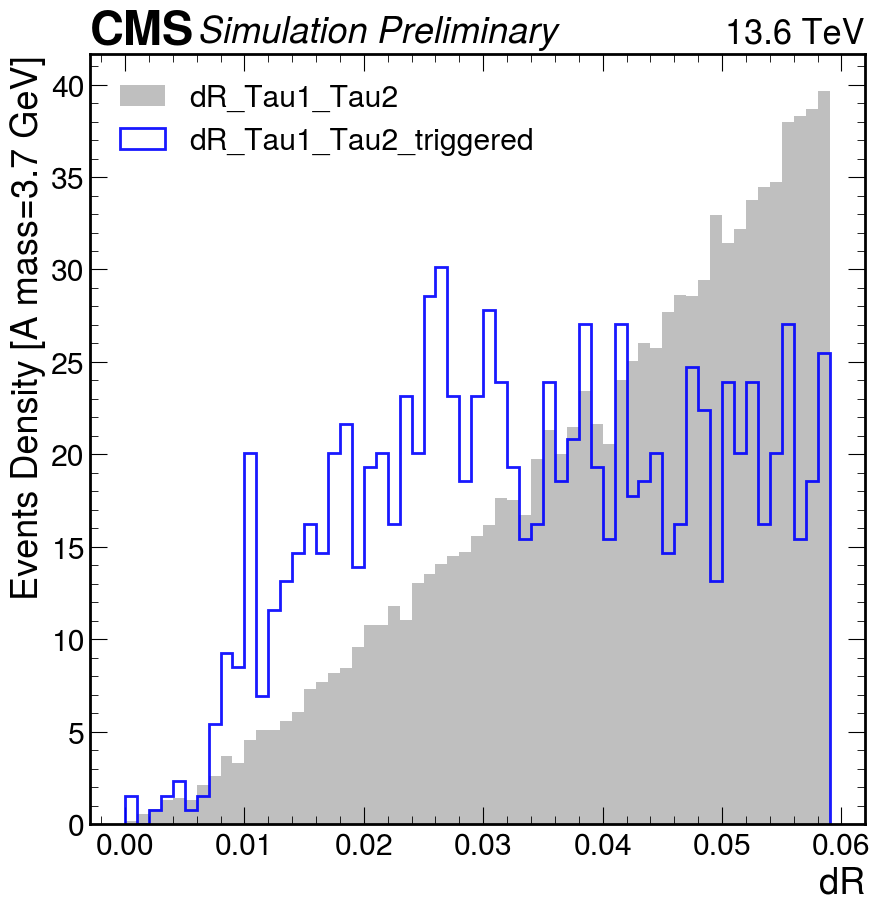

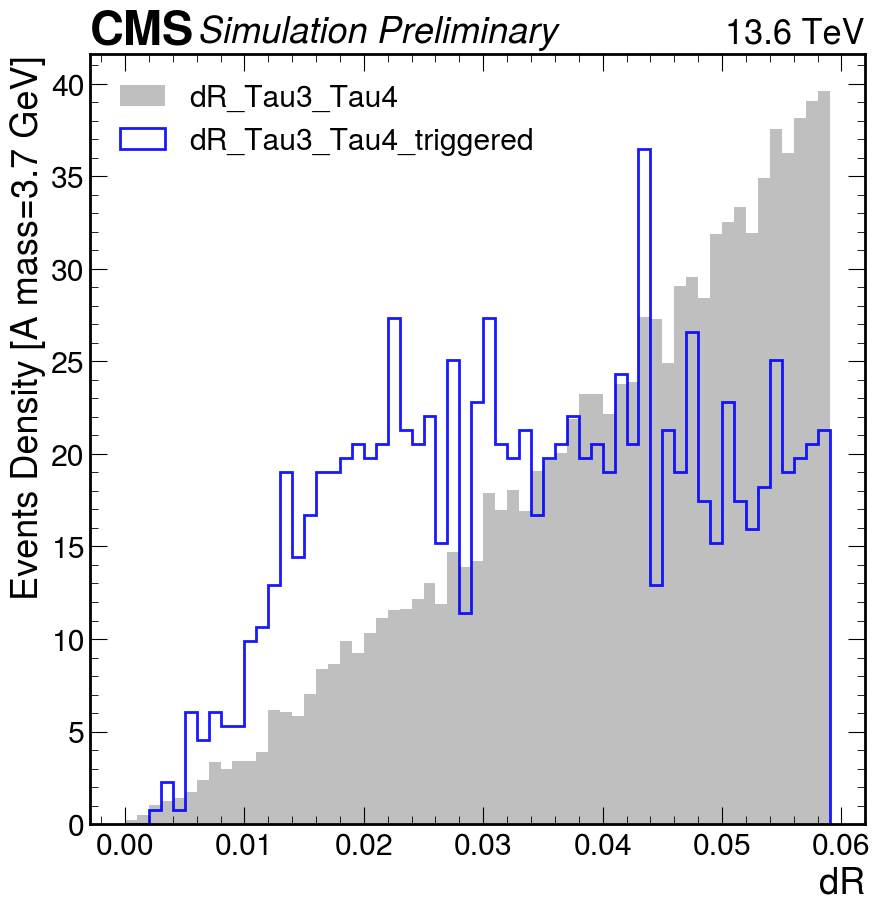

In [235]:
dR_Tau1_Tau2_after_trigger = RHTree.arrays(["dR_Tau1_Tau2"], "trigger > 0", library="numpy")["dR_Tau1_Tau2"]
dR_Tau1_Tau2_flat = np.concatenate(dR_Tau1_Tau2_after_trigger)
dR_Tau1_Tau2 = RHTree.arrays(["dR_Tau1_Tau2"],"dR_Tau1_Tau2 > -111",library="pd")['dR_Tau1_Tau2']
fig, ax = plt.subplots()
plt.hist(dR_Tau1_Tau2,bins=np.arange(0,0.06,0.001),linestyle='--',linewidth=2, color='grey',alpha=0.5,label="dR_Tau1_Tau2", density=1)
plt.hist(dR_Tau1_Tau2_flat,bins=np.arange(0,0.06,0.001),histtype='step',linewidth=2, color='b',alpha=0.9,label="dR_Tau1_Tau2_triggered", density=1)
plt.legend()
plt.ylabel("Events Density [A mass=3.7 GeV]")
plt.xlabel("dR")
plt.legend()
hep.cms.label(llabel="Simulation Preliminary", rlabel="13.6 TeV", loc=0, ax=ax)
print("Totgal entry", len(dR_Tau1_Tau2), "triggered", len(dR_Tau1_Tau2_flat))

dR_Tau3_Tau4_after_trigger = RHTree.arrays(["dR_Tau3_Tau4"], "trigger > 0", library="numpy")["dR_Tau3_Tau4"]
dR_Tau3_Tau4_flat = np.concatenate(dR_Tau3_Tau4_after_trigger)
dR_Tau3_Tau4 = RHTree.arrays(["dR_Tau3_Tau4"],"dR_Tau3_Tau4 > -111",library="pd")['dR_Tau3_Tau4']
fig, ax = plt.subplots()
plt.hist(dR_Tau3_Tau4,bins=np.arange(0,0.06,0.001),linestyle='--',linewidth=2, color='grey',alpha=0.5,label="dR_Tau3_Tau4", density=1)
plt.hist(dR_Tau3_Tau4_flat,bins=np.arange(0,0.06,0.001),histtype='step',linewidth=2, color='b',alpha=0.9,label="dR_Tau3_Tau4_triggered", density=1)
plt.legend()
plt.ylabel("Events Density [A mass=3.7 GeV]")
plt.xlabel("dR")
plt.legend()
hep.cms.label(llabel="Simulation Preliminary", rlabel="13.6 TeV", loc=0, ax=ax)
# if save: plt.savefig('%s/gen_A_mass_hist.png'%(out_dir),  bbox_inches='tight', dpi=100, facecolor = "w")
print("Totgal entry", len(dR_Tau1_Tau2), "triggered", len(dR_Tau1_Tau2_flat))

Totgal entry 278963 triggered 2681
Totgal entry 278963 triggered 2681


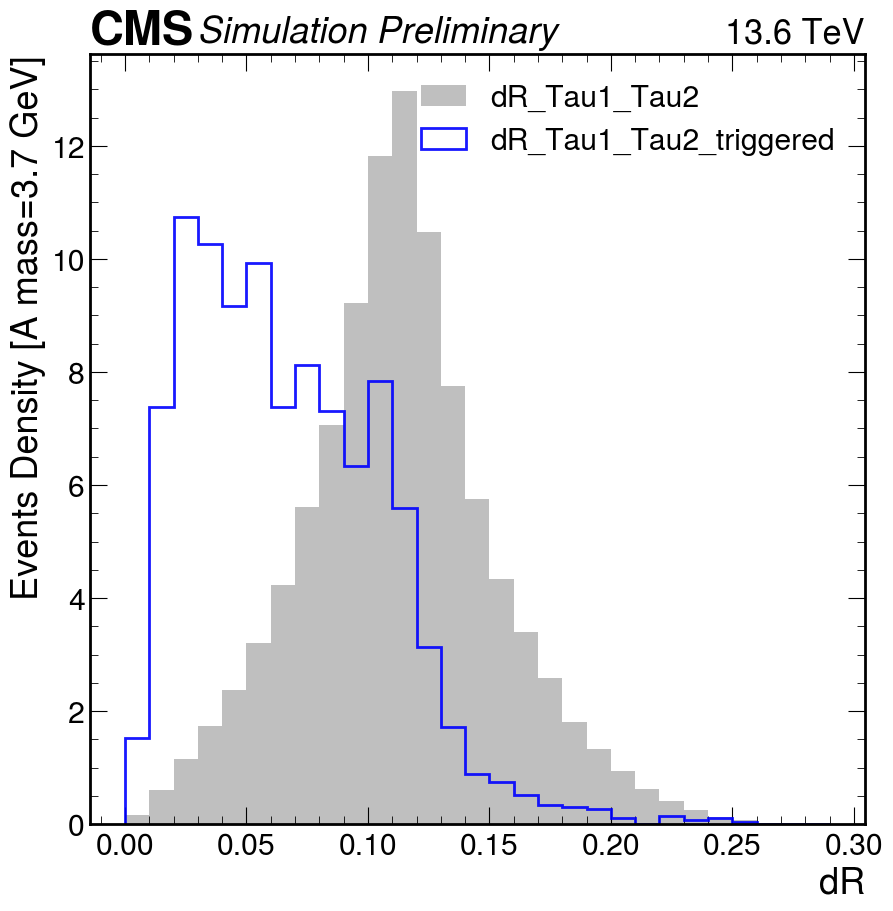

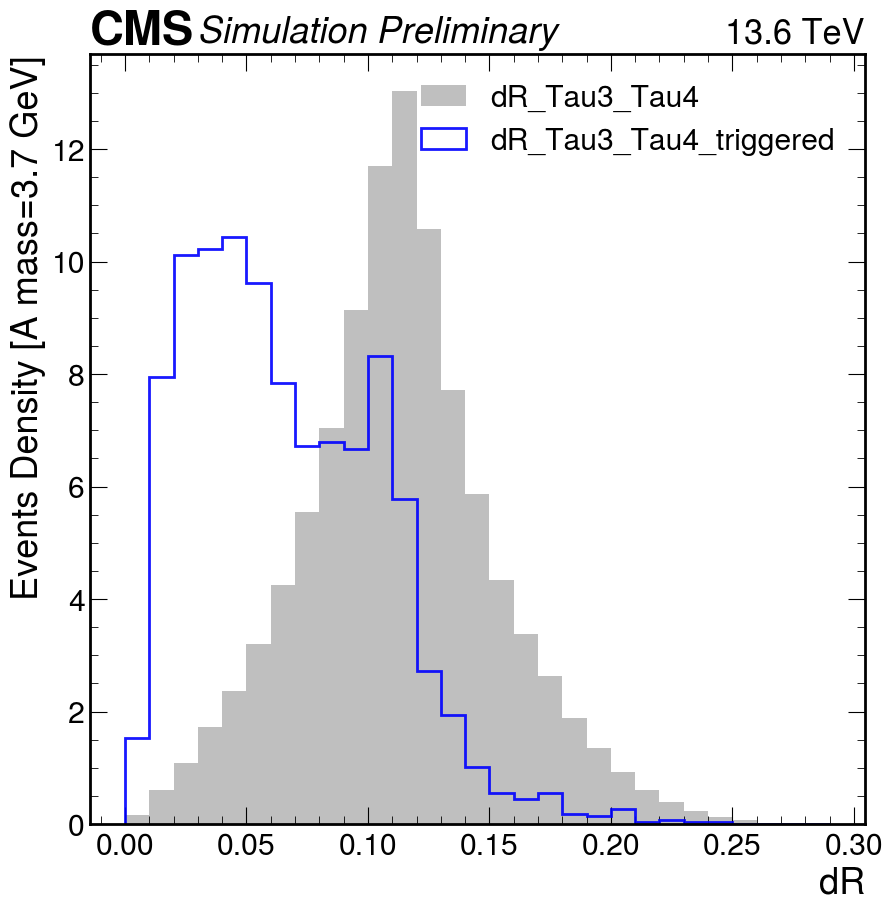

In [238]:
dR_Tau1_Tau2_after_trigger = RHTree.arrays(["dR_Tau1_Tau2"], "trigger > 0", library="numpy")["dR_Tau1_Tau2"]
dR_Tau1_Tau2_flat = np.concatenate(dR_Tau1_Tau2_after_trigger)
dR_Tau1_Tau2 = RHTree.arrays(["dR_Tau1_Tau2"],"dR_Tau1_Tau2 > -111",library="pd")['dR_Tau1_Tau2']
fig, ax = plt.subplots()
plt.hist(dR_Tau1_Tau2,bins=np.arange(0,.3,0.01),linestyle='--',linewidth=2, color='grey',alpha=0.5,label="dR_Tau1_Tau2", density=1)
plt.hist(dR_Tau1_Tau2_flat,bins=np.arange(0,0.3,0.01),histtype='step',linewidth=2, color='b',alpha=0.9,label="dR_Tau1_Tau2_triggered", density=1)
plt.legend()
plt.ylabel("Events Density [A mass=3.7 GeV]")
plt.xlabel("dR")
plt.legend()
hep.cms.label(llabel="Simulation Preliminary", rlabel="13.6 TeV", loc=0, ax=ax)
print("Totgal entry", len(dR_Tau1_Tau2), "triggered", len(dR_Tau1_Tau2_flat))

dR_Tau3_Tau4_after_trigger = RHTree.arrays(["dR_Tau3_Tau4"], "trigger > 0", library="numpy")["dR_Tau3_Tau4"]
dR_Tau3_Tau4_flat = np.concatenate(dR_Tau3_Tau4_after_trigger)
dR_Tau3_Tau4 = RHTree.arrays(["dR_Tau3_Tau4"],"dR_Tau3_Tau4 > -111",library="pd")['dR_Tau3_Tau4']
fig, ax = plt.subplots()
plt.hist(dR_Tau3_Tau4,bins=np.arange(0,0.3,0.01),linestyle='--',linewidth=2, color='grey',alpha=0.5,label="dR_Tau3_Tau4", density=1)
plt.hist(dR_Tau3_Tau4_flat,bins=np.arange(0,0.3,0.01),histtype='step',linewidth=2, color='b',alpha=0.9,label="dR_Tau3_Tau4_triggered", density=1)
plt.legend()
plt.ylabel("Events Density [A mass=3.7 GeV]")
plt.xlabel("dR")
plt.legend()
hep.cms.label(llabel="Simulation Preliminary", rlabel="13.6 TeV", loc=0, ax=ax)
# if save: plt.savefig('%s/gen_A_mass_hist.png'%(out_dir),  bbox_inches='tight', dpi=100, facecolor = "w")
print("Totgal entry", len(dR_Tau1_Tau2), "triggered", len(dR_Tau1_Tau2_flat))

Totgal entry 278963 triggered 2681
Totgal entry 278963 triggered 2681


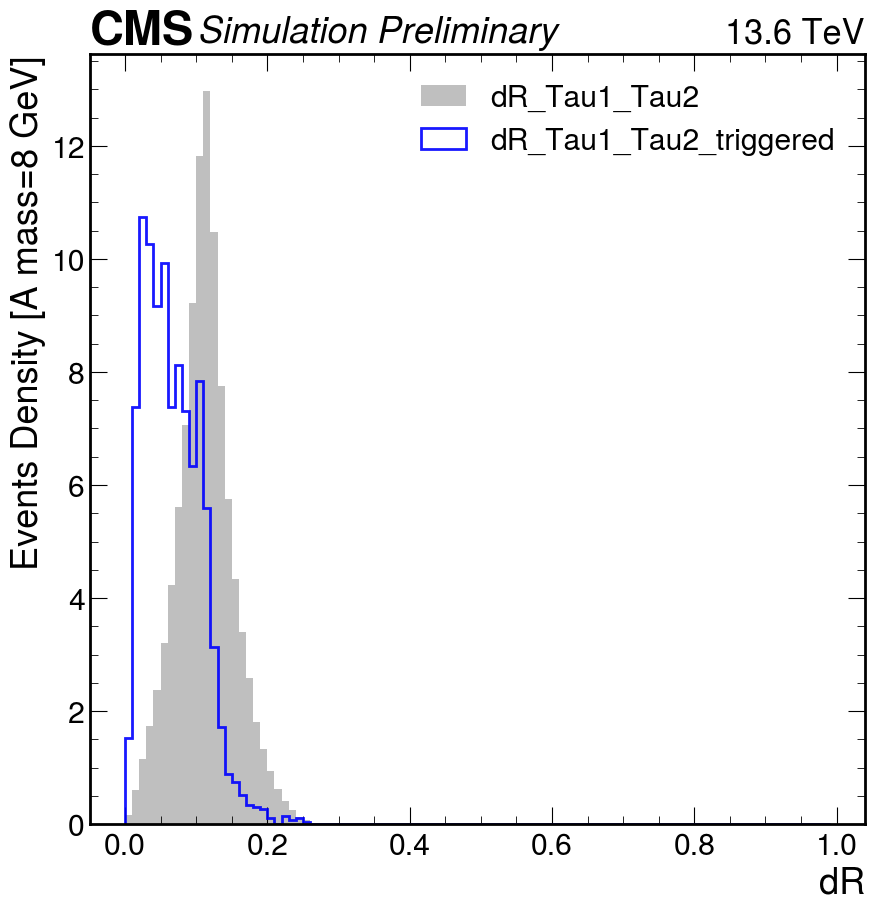

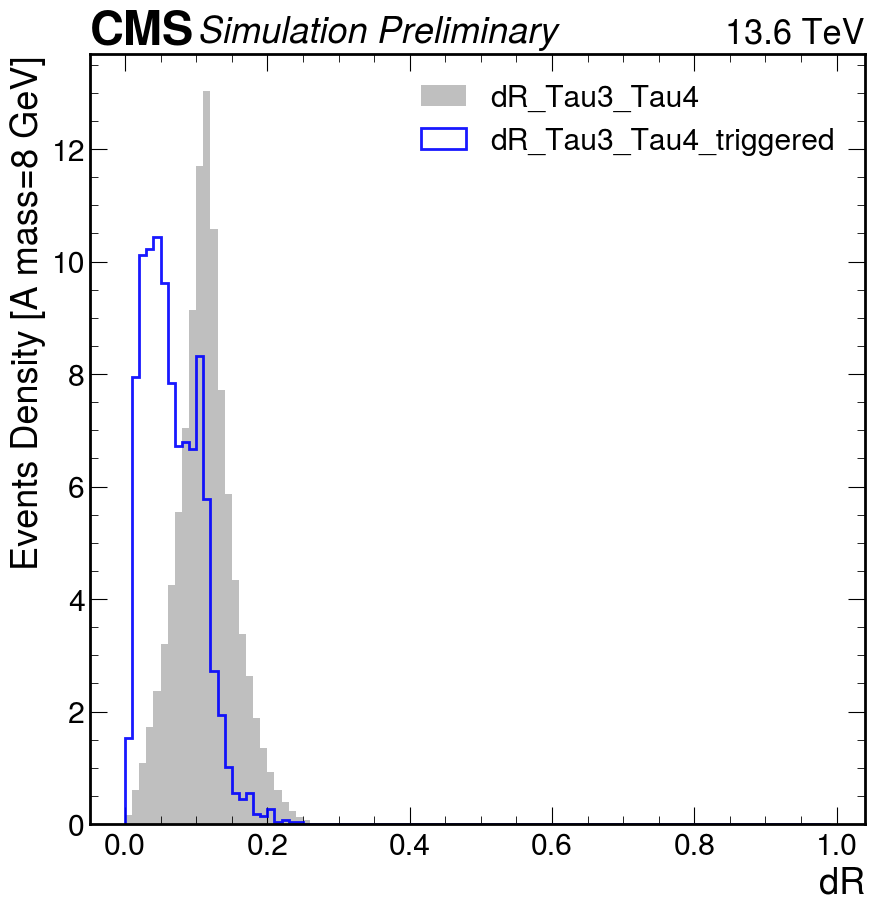

In [239]:
dR_Tau1_Tau2_after_trigger = RHTree.arrays(["dR_Tau1_Tau2"], "trigger > 0", library="numpy")["dR_Tau1_Tau2"]
dR_Tau1_Tau2_flat = np.concatenate(dR_Tau1_Tau2_after_trigger)
dR_Tau1_Tau2 = RHTree.arrays(["dR_Tau1_Tau2"],"dR_Tau1_Tau2 > -111",library="pd")['dR_Tau1_Tau2']
fig, ax = plt.subplots()
plt.hist(dR_Tau1_Tau2,bins=np.arange(0,1,0.01),linestyle='--',linewidth=2, color='grey',alpha=0.5,label="dR_Tau1_Tau2", density=1)
plt.hist(dR_Tau1_Tau2_flat,bins=np.arange(0,1,0.01),histtype='step',linewidth=2, color='b',alpha=0.9,label="dR_Tau1_Tau2_triggered", density=1)
plt.legend()
plt.ylabel("Events Density [A mass=8 GeV]")
plt.xlabel("dR")
plt.legend()
hep.cms.label(llabel="Simulation Preliminary", rlabel="13.6 TeV", loc=0, ax=ax)
print("Totgal entry", len(dR_Tau1_Tau2), "triggered", len(dR_Tau1_Tau2_flat))

dR_Tau3_Tau4_after_trigger = RHTree.arrays(["dR_Tau3_Tau4"], "trigger > 0", library="numpy")["dR_Tau3_Tau4"]
dR_Tau3_Tau4_flat = np.concatenate(dR_Tau3_Tau4_after_trigger)
dR_Tau3_Tau4 = RHTree.arrays(["dR_Tau3_Tau4"],"dR_Tau3_Tau4 > -111",library="pd")['dR_Tau3_Tau4']
fig, ax = plt.subplots()
plt.hist(dR_Tau3_Tau4,bins=np.arange(0,1,0.01),linestyle='--',linewidth=2, color='grey',alpha=0.5,label="dR_Tau3_Tau4", density=1)
plt.hist(dR_Tau3_Tau4_flat,bins=np.arange(0,1,0.01),histtype='step',linewidth=2, color='b',alpha=0.9,label="dR_Tau3_Tau4_triggered", density=1)
plt.legend()
plt.ylabel("Events Density [A mass=8 GeV]")
plt.xlabel("dR")
plt.legend()
hep.cms.label(llabel="Simulation Preliminary", rlabel="13.6 TeV", loc=0, ax=ax)
# if save: plt.savefig('%s/gen_A_mass_hist.png'%(out_dir),  bbox_inches='tight', dpi=100, facecolor = "w")
print("Totgal entry", len(dR_Tau1_Tau2), "triggered", len(dR_Tau1_Tau2_flat))

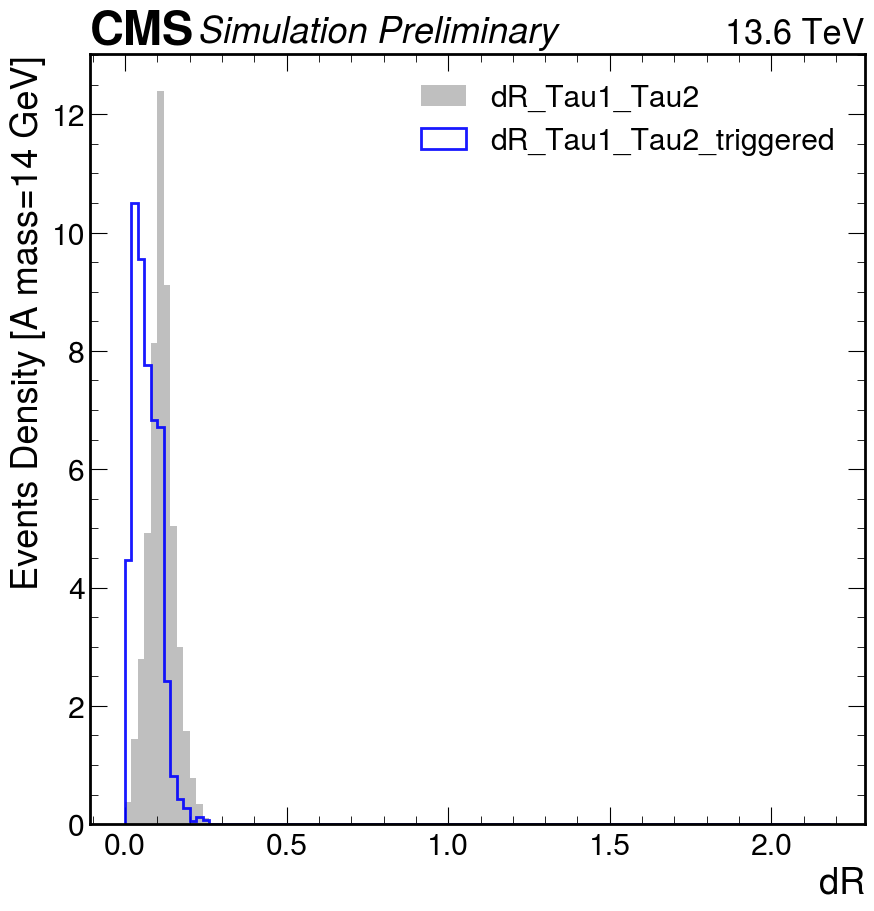

Totgal entry 278963 triggered 2681


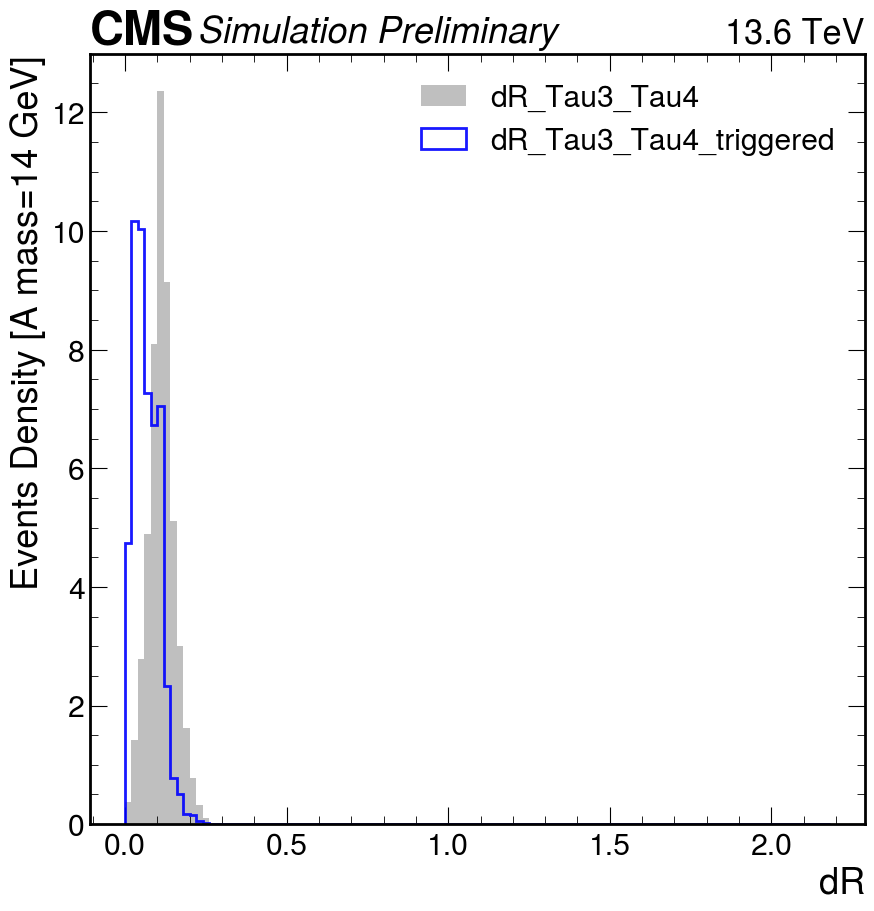

Totgal entry 278963 triggered 2681


In [240]:
dR_Tau1_Tau2_after_trigger = RHTree.arrays(["dR_Tau1_Tau2"], "trigger > 0", library="numpy")["dR_Tau1_Tau2"]
dR_Tau1_Tau2_flat = np.concatenate(dR_Tau1_Tau2_after_trigger)
dR_Tau1_Tau2 = RHTree.arrays(["dR_Tau1_Tau2"],"dR_Tau1_Tau2 > -111",library="pd")['dR_Tau1_Tau2']
fig, ax = plt.subplots()
plt.hist(dR_Tau1_Tau2,bins=np.arange(0,2.2,0.02),linestyle='--',linewidth=2, color='grey',alpha=0.5,label="dR_Tau1_Tau2", density=1)
plt.hist(dR_Tau1_Tau2_flat,bins=np.arange(0,2.2,0.02),histtype='step',linewidth=2, color='b',alpha=0.9,label="dR_Tau1_Tau2_triggered", density=1)
plt.legend()
plt.ylabel("Events Density [A mass=14 GeV]")
plt.xlabel("dR")
plt.legend()
hep.cms.label(llabel="Simulation Preliminary", rlabel="13.6 TeV", loc=0, ax=ax)
# if save: plt.savefig('%s/gen_A_mass_hist.png'%(out_dir),  bbox_inches='tight', dpi=100, facecolor = "w")
plt.show()
print("Totgal entry", len(dR_Tau1_Tau2), "triggered", len(dR_Tau1_Tau2_flat))

dR_Tau3_Tau4_after_trigger = RHTree.arrays(["dR_Tau3_Tau4"], "trigger > 0", library="numpy")["dR_Tau3_Tau4"]
dR_Tau3_Tau4_flat = np.concatenate(dR_Tau3_Tau4_after_trigger)
dR_Tau3_Tau4 = RHTree.arrays(["dR_Tau3_Tau4"],"dR_Tau3_Tau4 > -111",library="pd")['dR_Tau3_Tau4']
fig, ax = plt.subplots()
plt.hist(dR_Tau3_Tau4,bins=np.arange(0,2.2,0.02),linestyle='--',linewidth=2, color='grey',alpha=0.5,label="dR_Tau3_Tau4", density=1)
plt.hist(dR_Tau3_Tau4_flat,bins=np.arange(0,2.2,0.02),histtype='step',linewidth=2, color='b',alpha=0.9,label="dR_Tau3_Tau4_triggered", density=1)
plt.legend()
plt.ylabel("Events Density [A mass=14 GeV]")
plt.xlabel("dR")
plt.legend()
hep.cms.label(llabel="Simulation Preliminary", rlabel="13.6 TeV", loc=0, ax=ax)
# if save: plt.savefig('%s/gen_A_mass_hist.png'%(out_dir),  bbox_inches='tight', dpi=100, facecolor = "w")
plt.show()
print("Totgal entry", len(dR_Tau1_Tau2), "triggered", len(dR_Tau1_Tau2_flat))

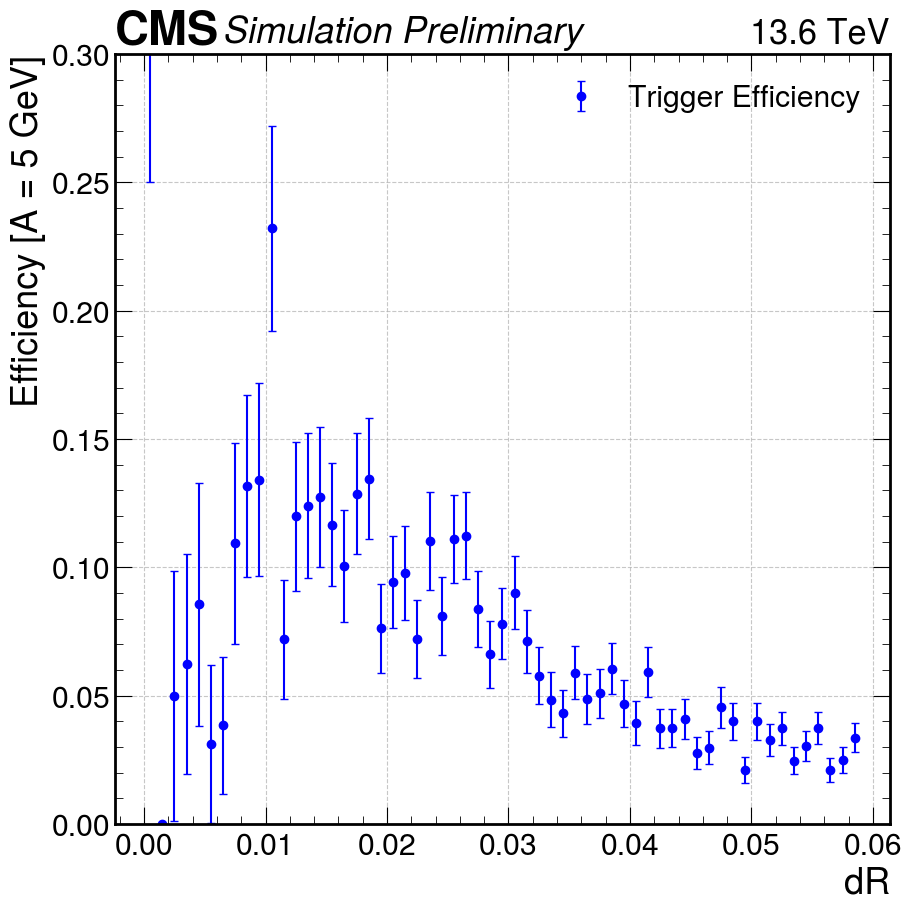

In [250]:
# Define bins
bins = np.arange(0, 0.06, 0.001)

# Compute histograms using np.histogram instead of plt.hist
before_trigger_counts, bin_edges = np.histogram(dR_Tau1_Tau2, bins=bins)
after_trigger_counts, _ = np.histogram(dR_Tau1_Tau2_flat, bins=bins)

# Compute efficiency with handling for division by zero
efficiency = np.divide(after_trigger_counts, before_trigger_counts, 
                       out=np.zeros_like(after_trigger_counts, dtype=float), 
                       where=before_trigger_counts != 0)

# Compute bin centers
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Compute binomial errors (only for valid bins)
efficiency_err = np.zeros_like(efficiency)
valid_bins = before_trigger_counts > 0  # Avoid division by zero

efficiency_err[valid_bins] = np.sqrt(efficiency[valid_bins] * (1 - efficiency[valid_bins]) / before_trigger_counts[valid_bins])

# Plot efficiency with error bars
fig, ax = plt.subplots()
plt.errorbar(bin_centers, efficiency, yerr=efficiency_err, fmt='o', color='b', label="Trigger Efficiency", capsize=3)
plt.xlabel("dR")
plt.ylabel("Efficiency [A = 5 GeV]")
plt.ylim(0, 0.3)  # Efficiency ranges from 0 to 1
plt.axhline(y=1, color='gray', linestyle='--', linewidth=1)  # Reference line at efficiency = 1
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
hep.cms.label(llabel="Simulation Preliminary", rlabel="13.6 TeV", loc=0, ax=ax)
plt.show()


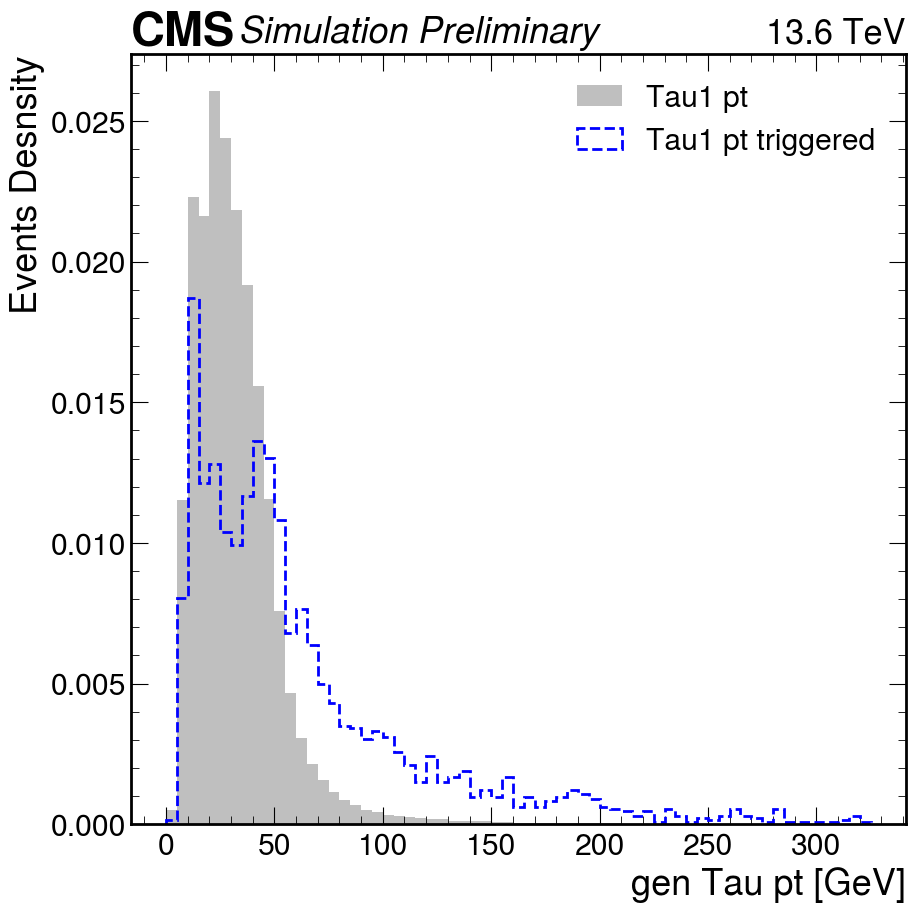

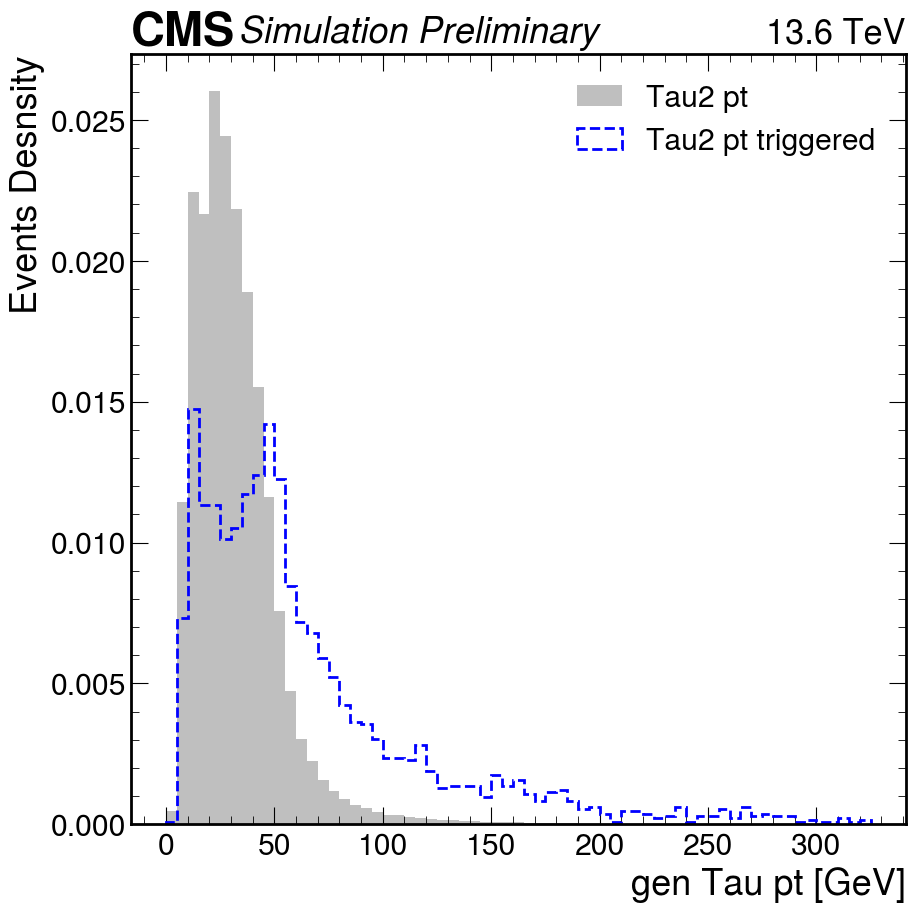

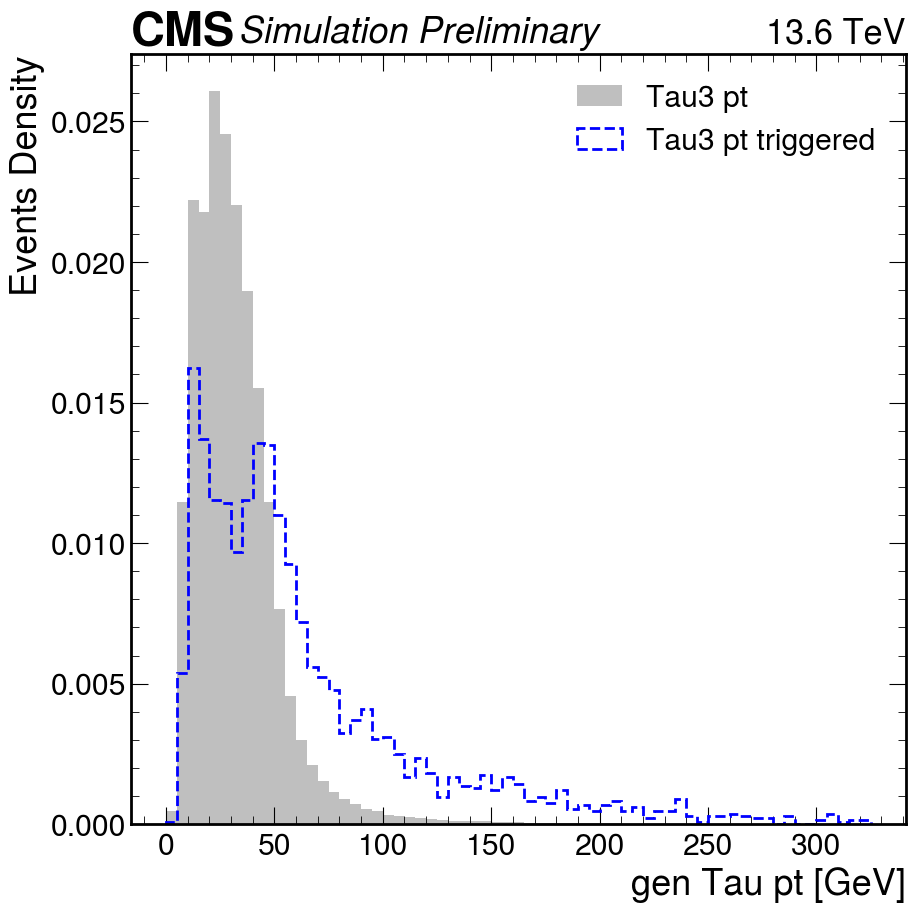

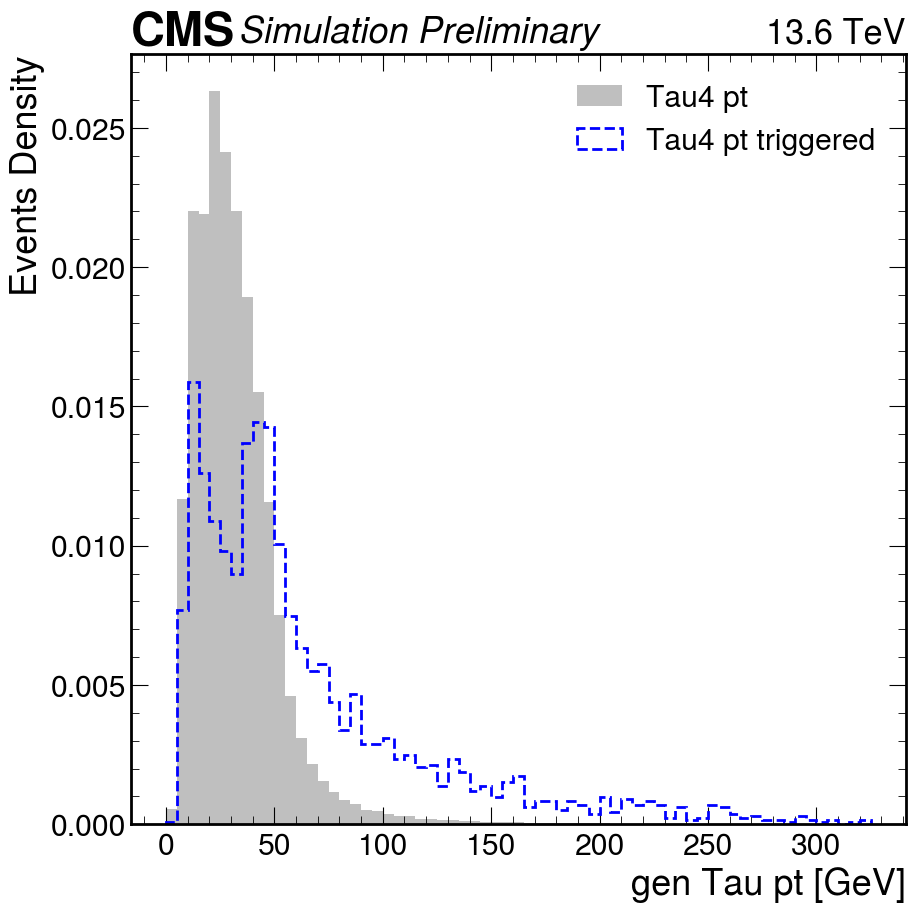

In [242]:
Tau1_pt_after_trigger = RHTree.arrays(["Tau1_pt"], "trigger > 0", library="numpy")["Tau1_pt"]
Tau1_pt_flat = np.concatenate(Tau1_pt_after_trigger)
Tau1_pt = RHTree.arrays(["Tau1_pt"],"Tau1_pt > -111",library="pd")['Tau1_pt']
fig, ax = plt.subplots()
plt.hist(Tau1_pt,bins=np.arange(0,330,5),linewidth=2, color='grey',alpha=0.5,label="Tau1 pt", density=1)
plt.hist(Tau1_pt_flat,bins=np.arange(0,330,5),histtype='step',linestyle='--',linewidth=2, color='b',label="Tau1 pt triggered", density=1)
plt.legend()
plt.ylabel("Events Desnsity")
plt.xlabel("gen Tau pt [GeV]")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13.6 TeV", loc=0, ax=ax)
plt.show()

Tau2_pt_after_trigger = RHTree.arrays(["Tau2_pt"], "trigger > 0", library="numpy")["Tau2_pt"]
Tau2_pt_flat = np.concatenate(Tau2_pt_after_trigger)
Tau2_pt = RHTree.arrays(["Tau2_pt"],"Tau2_pt > -111",library="pd")['Tau2_pt']
fig, ax = plt.subplots()
plt.hist(Tau2_pt,bins=np.arange(0,330,5),linewidth=2, color='grey',alpha=0.5,label="Tau2 pt", density=1)
plt.hist(Tau2_pt_flat,bins=np.arange(0,330,5),histtype='step',linestyle='--',linewidth=2, color='b',label="Tau2 pt triggered", density=1)
plt.legend()
plt.ylabel("Events Desnsity")
plt.xlabel("gen Tau pt [GeV]")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13.6 TeV", loc=0, ax=ax)
plt.show()

Tau3_pt_after_trigger = RHTree.arrays(["Tau3_pt"], "trigger > 0", library="numpy")["Tau3_pt"]
Tau3_pt_flat = np.concatenate(Tau3_pt_after_trigger)
Tau3_pt = RHTree.arrays(["Tau3_pt"],"Tau3_pt > -111",library="pd")['Tau3_pt']
fig, ax = plt.subplots()
plt.hist(Tau3_pt,bins=np.arange(0,330,5),linewidth=2, color='grey',alpha=0.5,label="Tau3 pt", density=1)
plt.hist(Tau3_pt_flat,bins=np.arange(0,330,5),histtype='step',linestyle='--',linewidth=2, color='b',label="Tau3 pt triggered", density=1)
plt.legend()
plt.ylabel("Events Density")
plt.xlabel("gen Tau pt [GeV]")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13.6 TeV", loc=0, ax=ax)
plt.show()

Tau4_pt_after_trigger = RHTree.arrays(["Tau4_pt"], "trigger > 0", library="numpy")["Tau4_pt"]
Tau4_pt_flat = np.concatenate(Tau4_pt_after_trigger)
Tau4_pt = RHTree.arrays(["Tau4_pt"],"Tau4_pt > -111",library="pd")['Tau4_pt']
fig, ax = plt.subplots()
plt.hist(Tau4_pt,bins=np.arange(0,330,5),linewidth=2, color='grey',alpha=0.5,label="Tau4 pt", density=1)
plt.hist(Tau4_pt_flat,bins=np.arange(0,330,5),histtype='step',linestyle='--',linewidth=2, color='b',label="Tau4 pt triggered", density=1)
plt.legend()
plt.ylabel("Events Density")
plt.xlabel("gen Tau pt [GeV]")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13.6 TeV", loc=0, ax=ax)
plt.show()

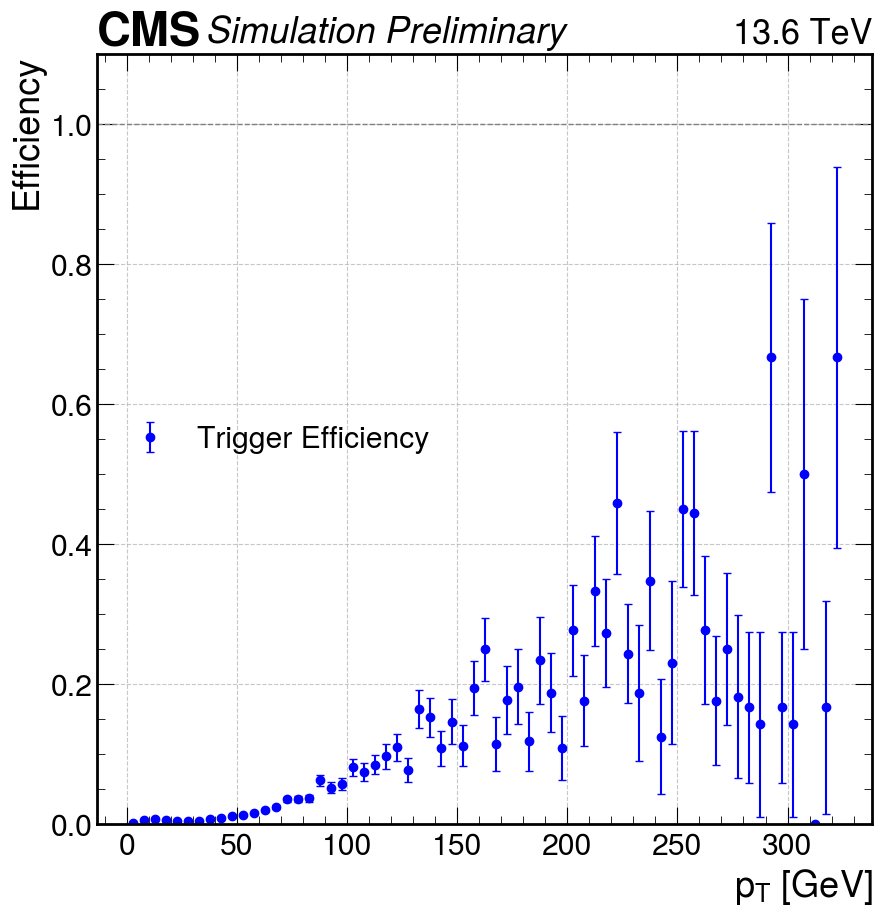

In [243]:



# Define bins
bins = np.arange(0, 330, 5)

# Compute histograms using np.histogram instead of plt.hist
before_trigger_counts, bin_edges = np.histogram(Tau4_pt, bins=bins)
after_trigger_counts, _ = np.histogram(Tau4_pt_flat, bins=bins)

# Compute efficiency with handling for division by zero
efficiency = np.divide(after_trigger_counts, before_trigger_counts, 
                       out=np.zeros_like(after_trigger_counts, dtype=float), 
                       where=before_trigger_counts != 0)

# Compute bin centers
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Compute binomial errors (only for valid bins)
efficiency_err = np.zeros_like(efficiency)
valid_bins = before_trigger_counts > 0  # Avoid division by zero

efficiency_err[valid_bins] = np.sqrt(efficiency[valid_bins] * (1 - efficiency[valid_bins]) / before_trigger_counts[valid_bins])

# Plot efficiency with error bars
fig, ax = plt.subplots()
plt.errorbar(bin_centers, efficiency, yerr=efficiency_err, fmt='o', color='b', label="Trigger Efficiency", capsize=3)
plt.xlabel(r"$p_T$ [GeV]")
plt.ylabel("Efficiency")

plt.ylim(0, 1.1)  # Efficiency ranges from 0 to 1
plt.axhline(y=1, color='gray', linestyle='--', linewidth=1)  # Reference line at efficiency = 1
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
hep.cms.label(llabel="Simulation Preliminary", rlabel="13.6 TeV", loc=0, ax=ax)
plt.show()


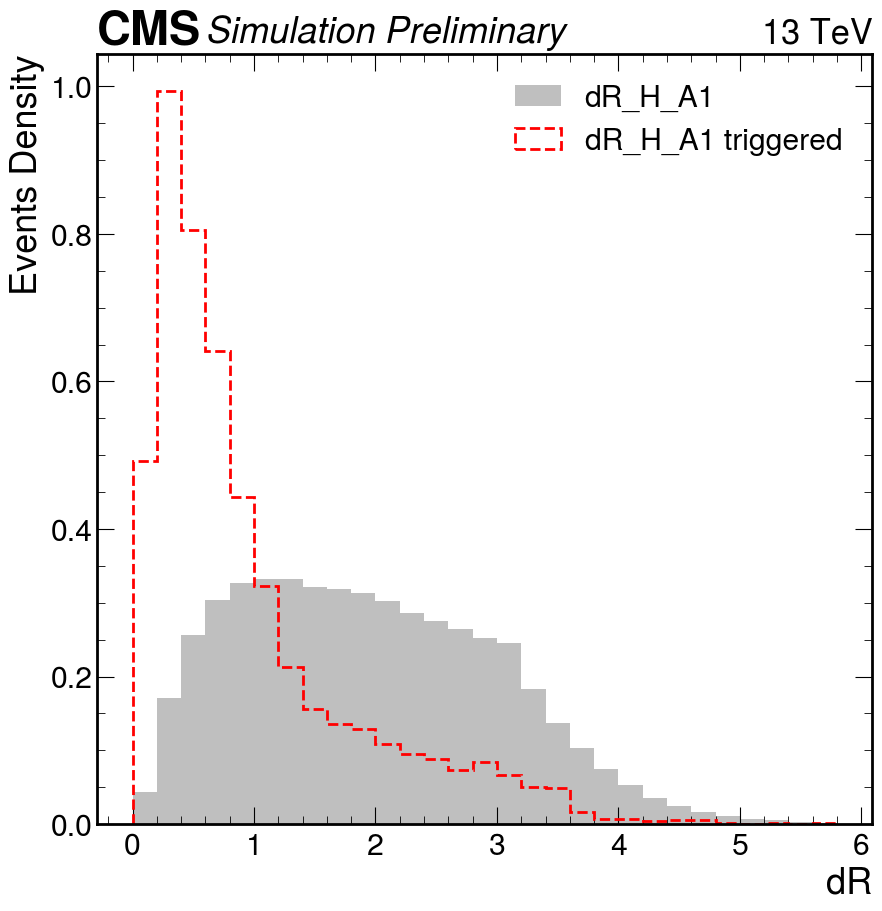

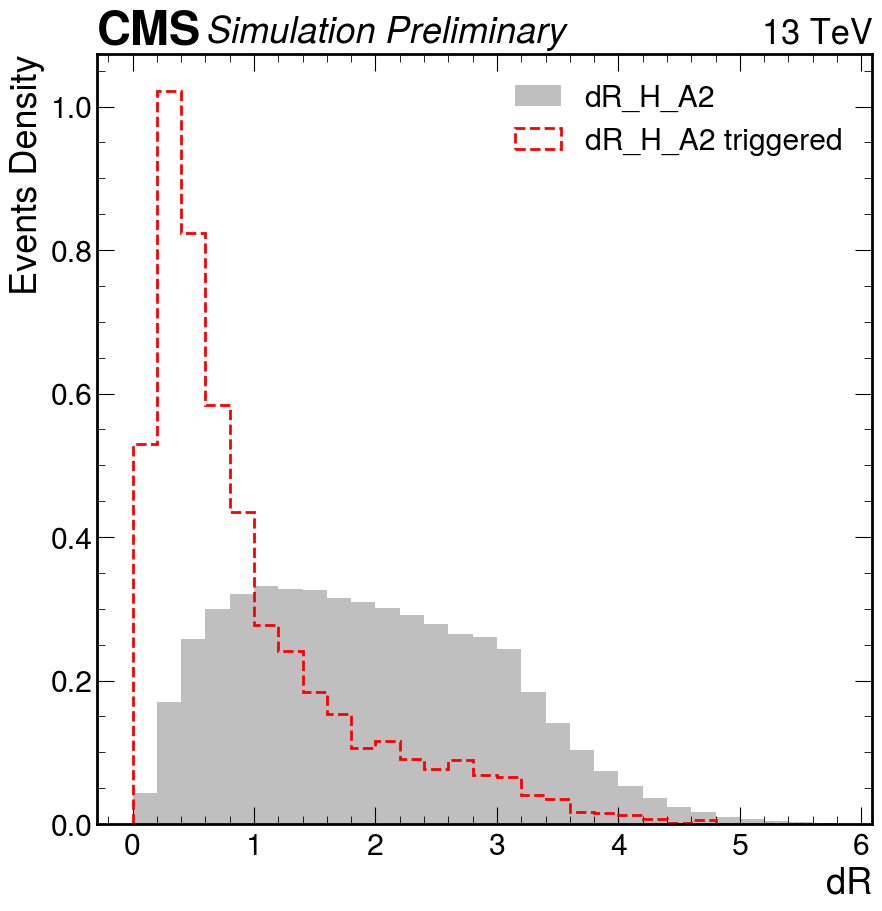

In [244]:
dR_H_A1_after_trigger = RHTree.arrays(["dR_H_A1"], "trigger > 0", library="numpy")["dR_H_A1"]
dR_H_A1_flat = np.concatenate(dR_H_A1_after_trigger)
dR_H_A1 = RHTree.arrays(["dR_H_A1"],"dR_H_A1 > -111",library="pd")['dR_H_A1']
fig, ax = plt.subplots(figsize=(10,10))
plt.hist(dR_H_A1,bins=np.arange(0,6,.2),alpha=0.5,linewidth=2, color='grey',label="dR_H_A1", density=1)
plt.hist(dR_H_A1_flat,bins=np.arange(0,6,.2),histtype='step',linestyle='--',linewidth=2, color='r',label="dR_H_A1 triggered", density=1)
plt.legend()
plt.ylabel("Events Density")
plt.xlabel("dR")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
plt.show()

dR_H_A2_after_trigger = RHTree.arrays(["dR_H_A2"], "trigger > 0", library="numpy")["dR_H_A2"]
dR_H_A2_flat = np.concatenate(dR_H_A2_after_trigger)
dR_H_A2 = RHTree.arrays(["dR_H_A2"],"dR_H_A2 > -111",library="pd")['dR_H_A2']
fig, ax = plt.subplots(figsize=(10,10))
plt.hist(dR_H_A2,bins=np.arange(0,6,.2),alpha=0.5,linewidth=2, color='grey',label="dR_H_A2", density=1)
plt.hist(dR_H_A2_flat,bins=np.arange(0,6,.2),histtype='step',linestyle='--',linewidth=2, color='r',label="dR_H_A2 triggered", density=1)
plt.legend()
plt.ylabel("Events Density")
plt.xlabel("dR")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
plt.show()

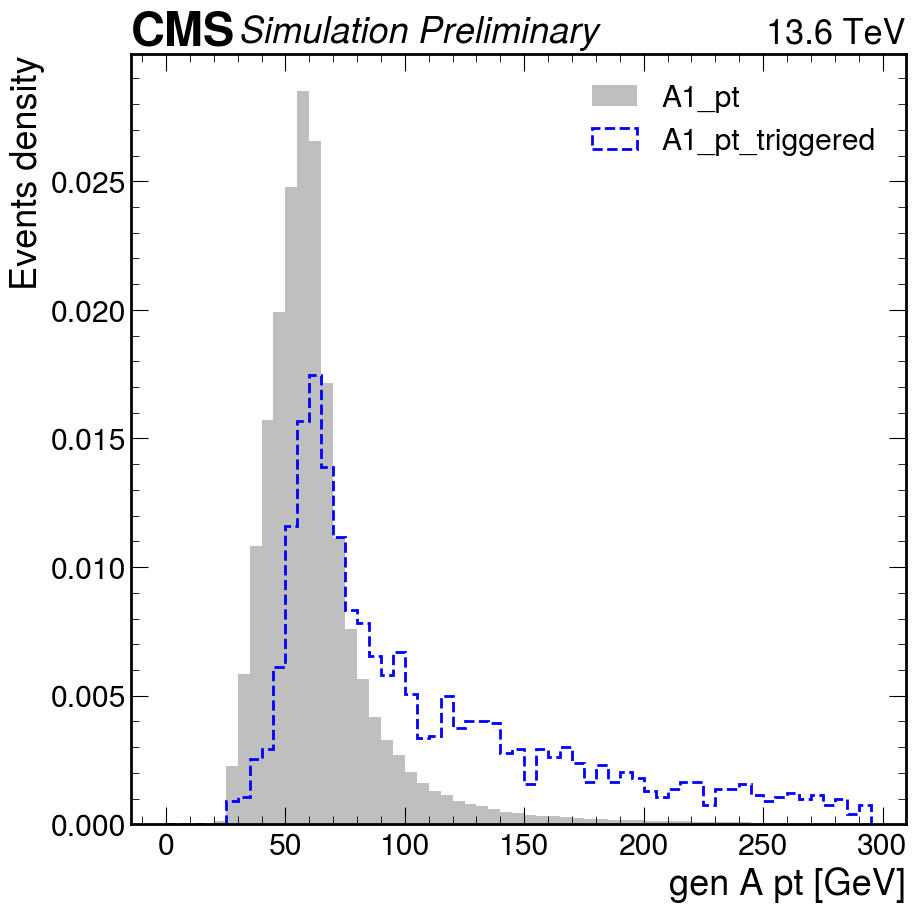

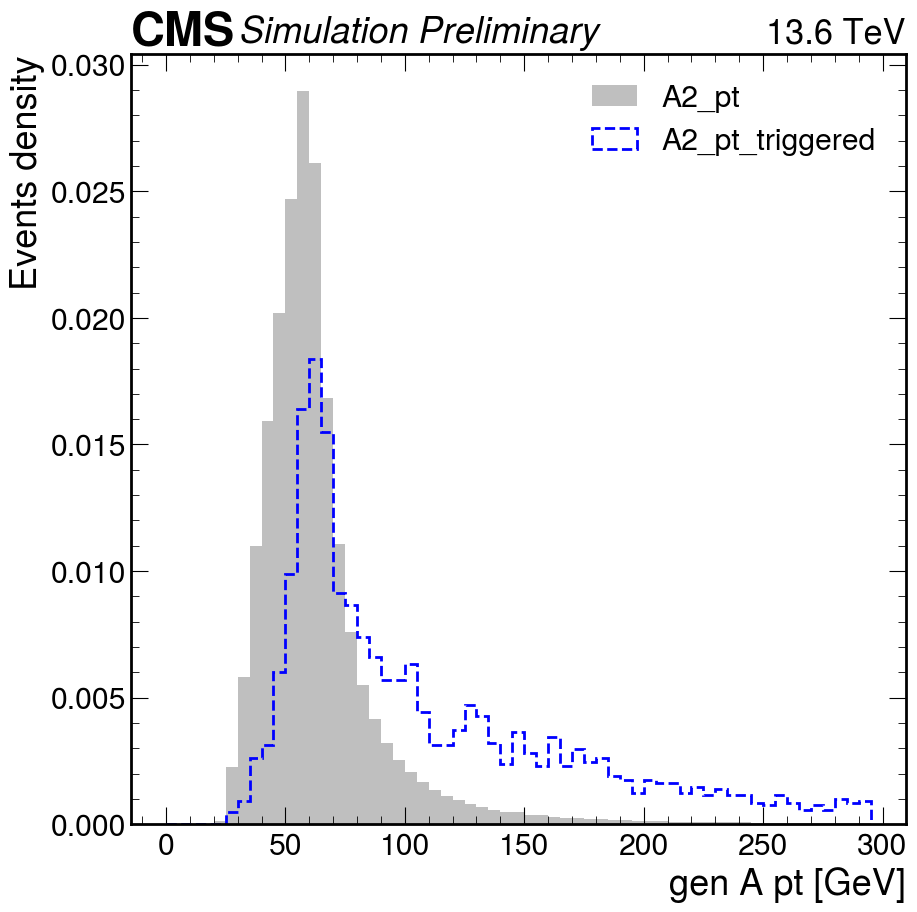

In [245]:
A1_pt_after_trigger = RHTree.arrays(["A1_pt"], "trigger > 0", library="numpy")["A1_pt"]
A1_pt_flat = np.concatenate(A1_pt_after_trigger)
A1_pt = RHTree.arrays(["A1_pt"],"A1_pt > -111",library="pd")['A1_pt']
fig, ax = plt.subplots()
plt.hist(A1_pt,bins=np.arange(0,300,5),color='grey',alpha=0.5,label="A1_pt", density=1)
plt.hist(A1_pt_flat,bins=np.arange(0,300,5),histtype='step',linestyle='--',linewidth=2, color='b', label="A1_pt_triggered", density=1)
plt.legend()
plt.ylabel("Events density")
plt.xlabel("gen A pt [GeV]")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13.6 TeV", loc=0, ax=ax)
plt.show()

A2_pt_after_trigger = RHTree.arrays(["A2_pt"], "trigger > 0", library="numpy")["A2_pt"]
A2_pt_flat = np.concatenate(A2_pt_after_trigger)
A2_pt = RHTree.arrays(["A2_pt"],"A2_pt > -111",library="pd")['A2_pt']
fig, ax = plt.subplots()
plt.hist(A2_pt,bins=np.arange(0,300,5),color='grey',alpha=0.5,label="A2_pt", density=1)
plt.hist(A2_pt_flat,bins=np.arange(0,300,5),histtype='step',linestyle='--',linewidth=2, color='b', label="A2_pt_triggered", density=1)
plt.legend()
plt.ylabel("Events density")
plt.xlabel("gen A pt [GeV]")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13.6 TeV", loc=0, ax=ax)
plt.show()

(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Simulation Preliminary'))

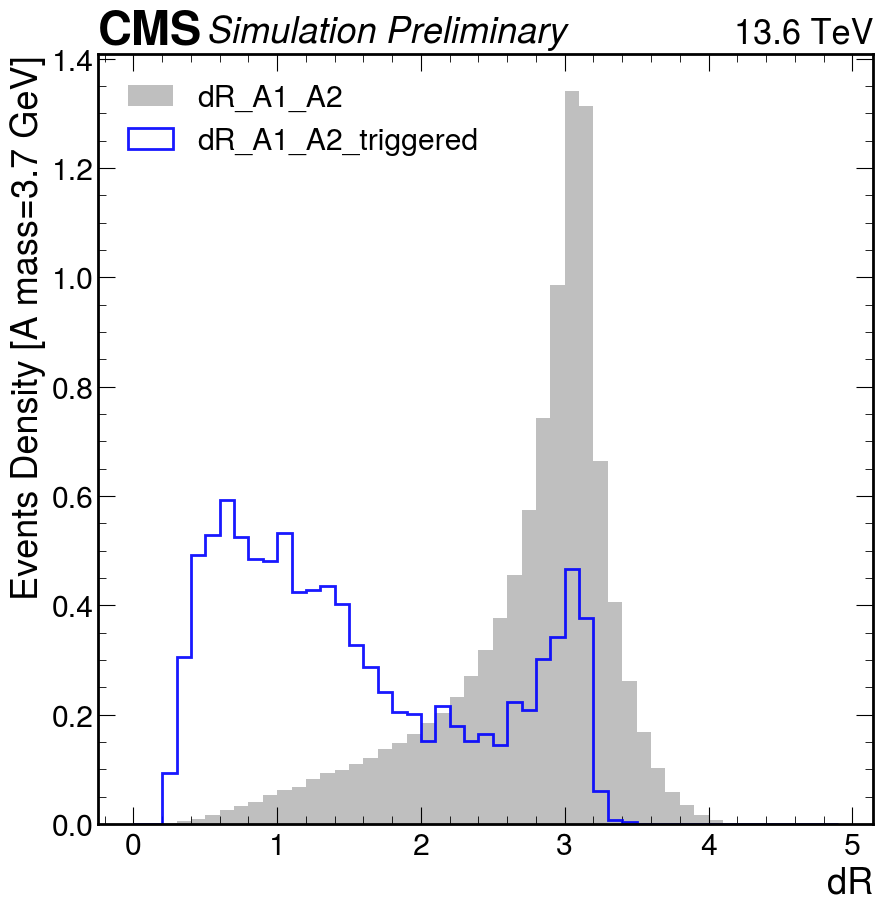

In [246]:
dR_A1_A2_after_trigger = RHTree.arrays(["dR_A1_A2"], "trigger > 0", library="numpy")["dR_A1_A2"]
dR_A1_A2_flat = np.concatenate(dR_A1_A2_after_trigger)
dR_A1_A2 = RHTree.arrays(["dR_A1_A2"],"dR_A1_A2 > -111",library="pd")['dR_A1_A2']
fig, ax = plt.subplots()
plt.hist(dR_A1_A2,bins=np.arange(0,5,0.1),linestyle='--',linewidth=2, color='grey',alpha=0.5,label="dR_A1_A2", density=1)
plt.hist(dR_A1_A2_flat,bins=np.arange(0,5,0.1),histtype='step',linewidth=2, color='b',alpha=0.9,label="dR_A1_A2_triggered", density=1)
plt.legend()
plt.ylabel("Events Density [A mass=3.7 GeV]")
plt.xlabel("dR")
plt.legend()
hep.cms.label(llabel="Simulation Preliminary", rlabel="13.6 TeV", loc=0, ax=ax)

(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Simulation Preliminary'))

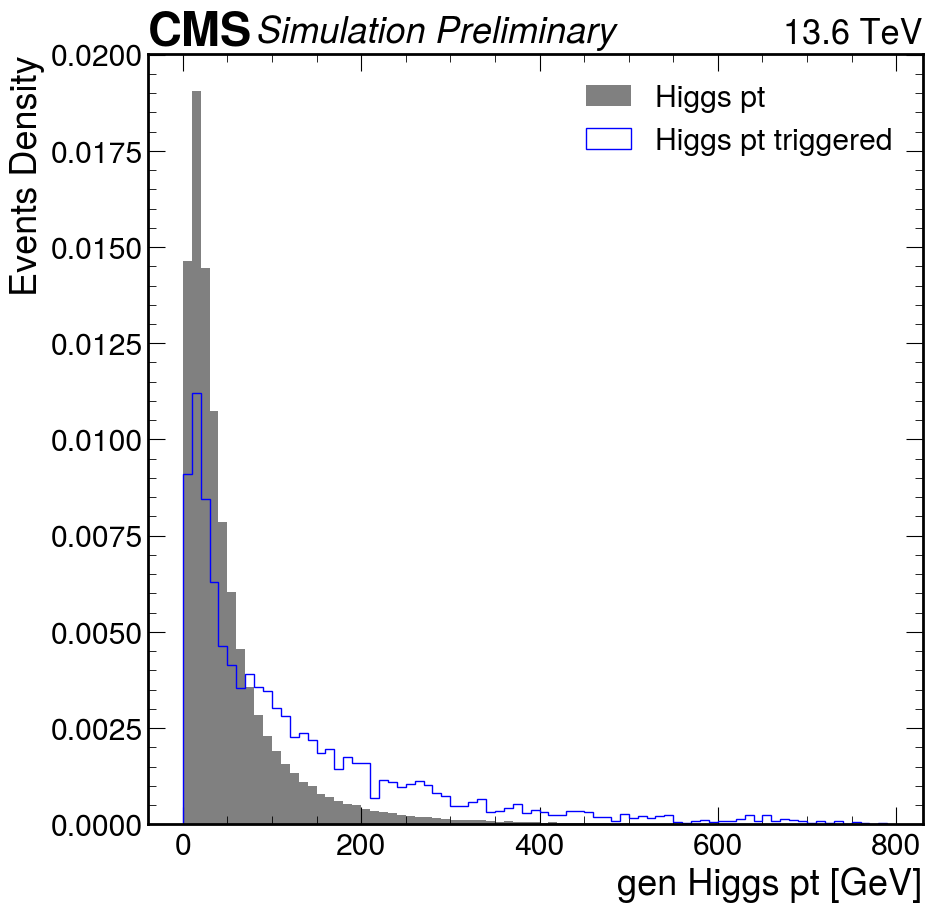

In [120]:
H_pt_after_trigger = RHTree.arrays(["H_pt"], "trigger > 0", library="numpy")["H_pt"]
H_pt_flat = np.concatenate(H_pt_after_trigger)
H_pt = RHTree.arrays(["H_pt"],"H_pt > -111",library="pd")['H_pt']
fig, ax = plt.subplots()
plt.hist(H_pt,bins=np.arange(0,800,10),color='grey',label="Higgs pt",density=1)
plt.hist(H_pt_flat,bins=np.arange(0,800,10),histtype='step', color='b',label="Higgs pt triggered",density=1)
plt.legend()
plt.ylabel("Events Density")
plt.xlabel("gen Higgs pt [GeV]")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13.6 TeV", loc=0, ax=ax)


In [111]:
# file = uproot.open("data/GenInfo_only_90.root")

RHTree = file["fevt/RHTree"]

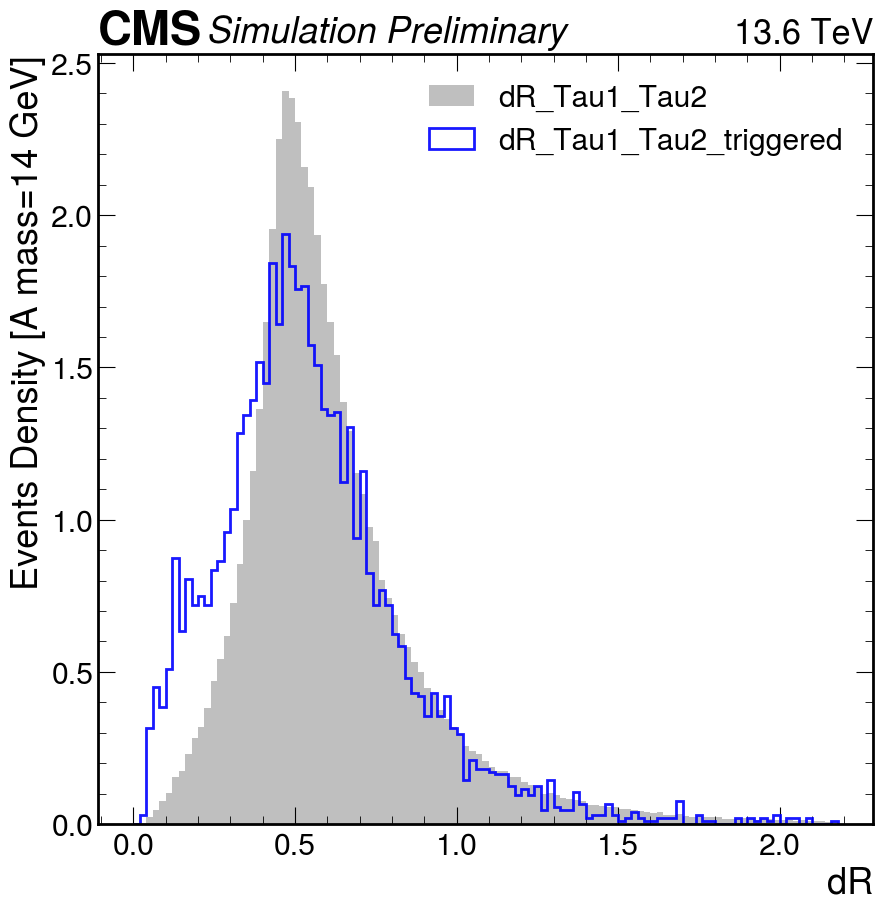

Totgal entry 201297 triggered 5216


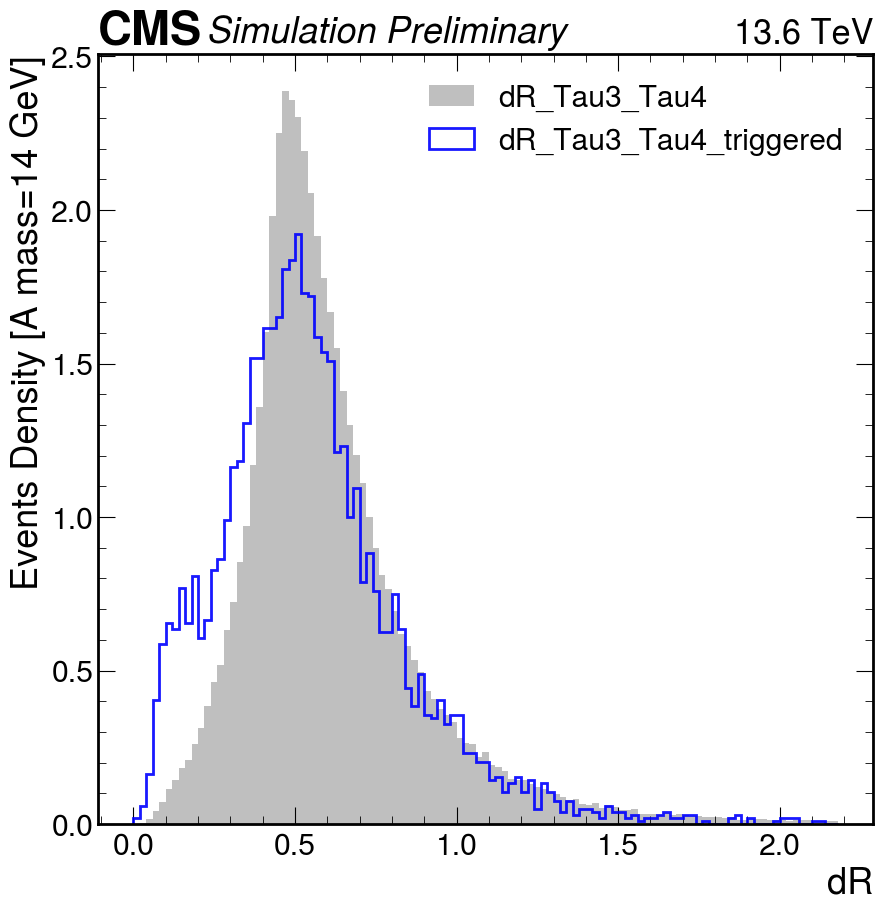

Totgal entry 201297 triggered 5216


(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Simulation Preliminary'))

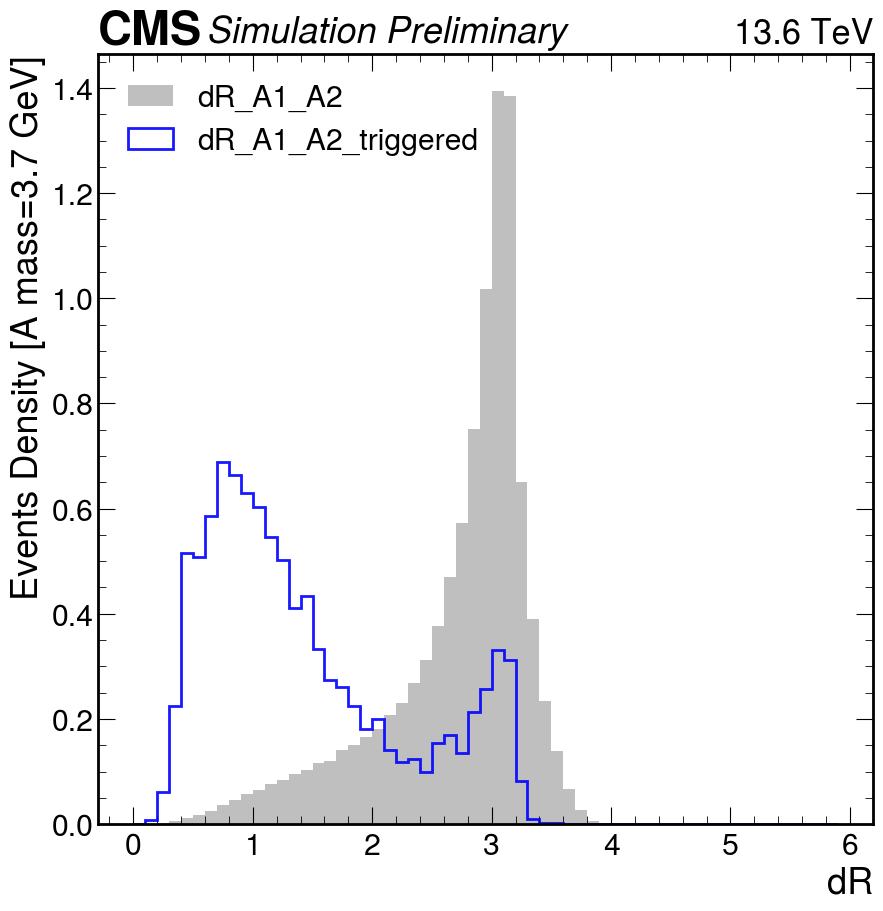